<a href="https://colab.research.google.com/github/lspajic20/Projekt-Python/blob/main/SUIS_Projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Prikaz deskriptivnih statistika i distribucija varijabli

In [ ]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
data['Revenue'] = data['Revenue'].astype('category')

data['VisitorType'] = data['VisitorType'].astype('category')
data['Weekend'] = data['Weekend'].astype('category')
data['OperatingSystems'] = data['OperatingSystems'].astype('category')
data['Browser'] = data['Browser'].astype('category')
data['Region'] = data['Region'].astype('category')
data['TrafficType'] = data['TrafficType'].astype('category')
data['Month'] = data['Month'].astype('category')



In [ ]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


In [ ]:
data.describe(include=['category']).loc[['top', 'freq']]

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
top,May,2,2,1,2,Returning_Visitor,False,False
freq,3364,6601,7961,4780,3913,10551,9462,10422


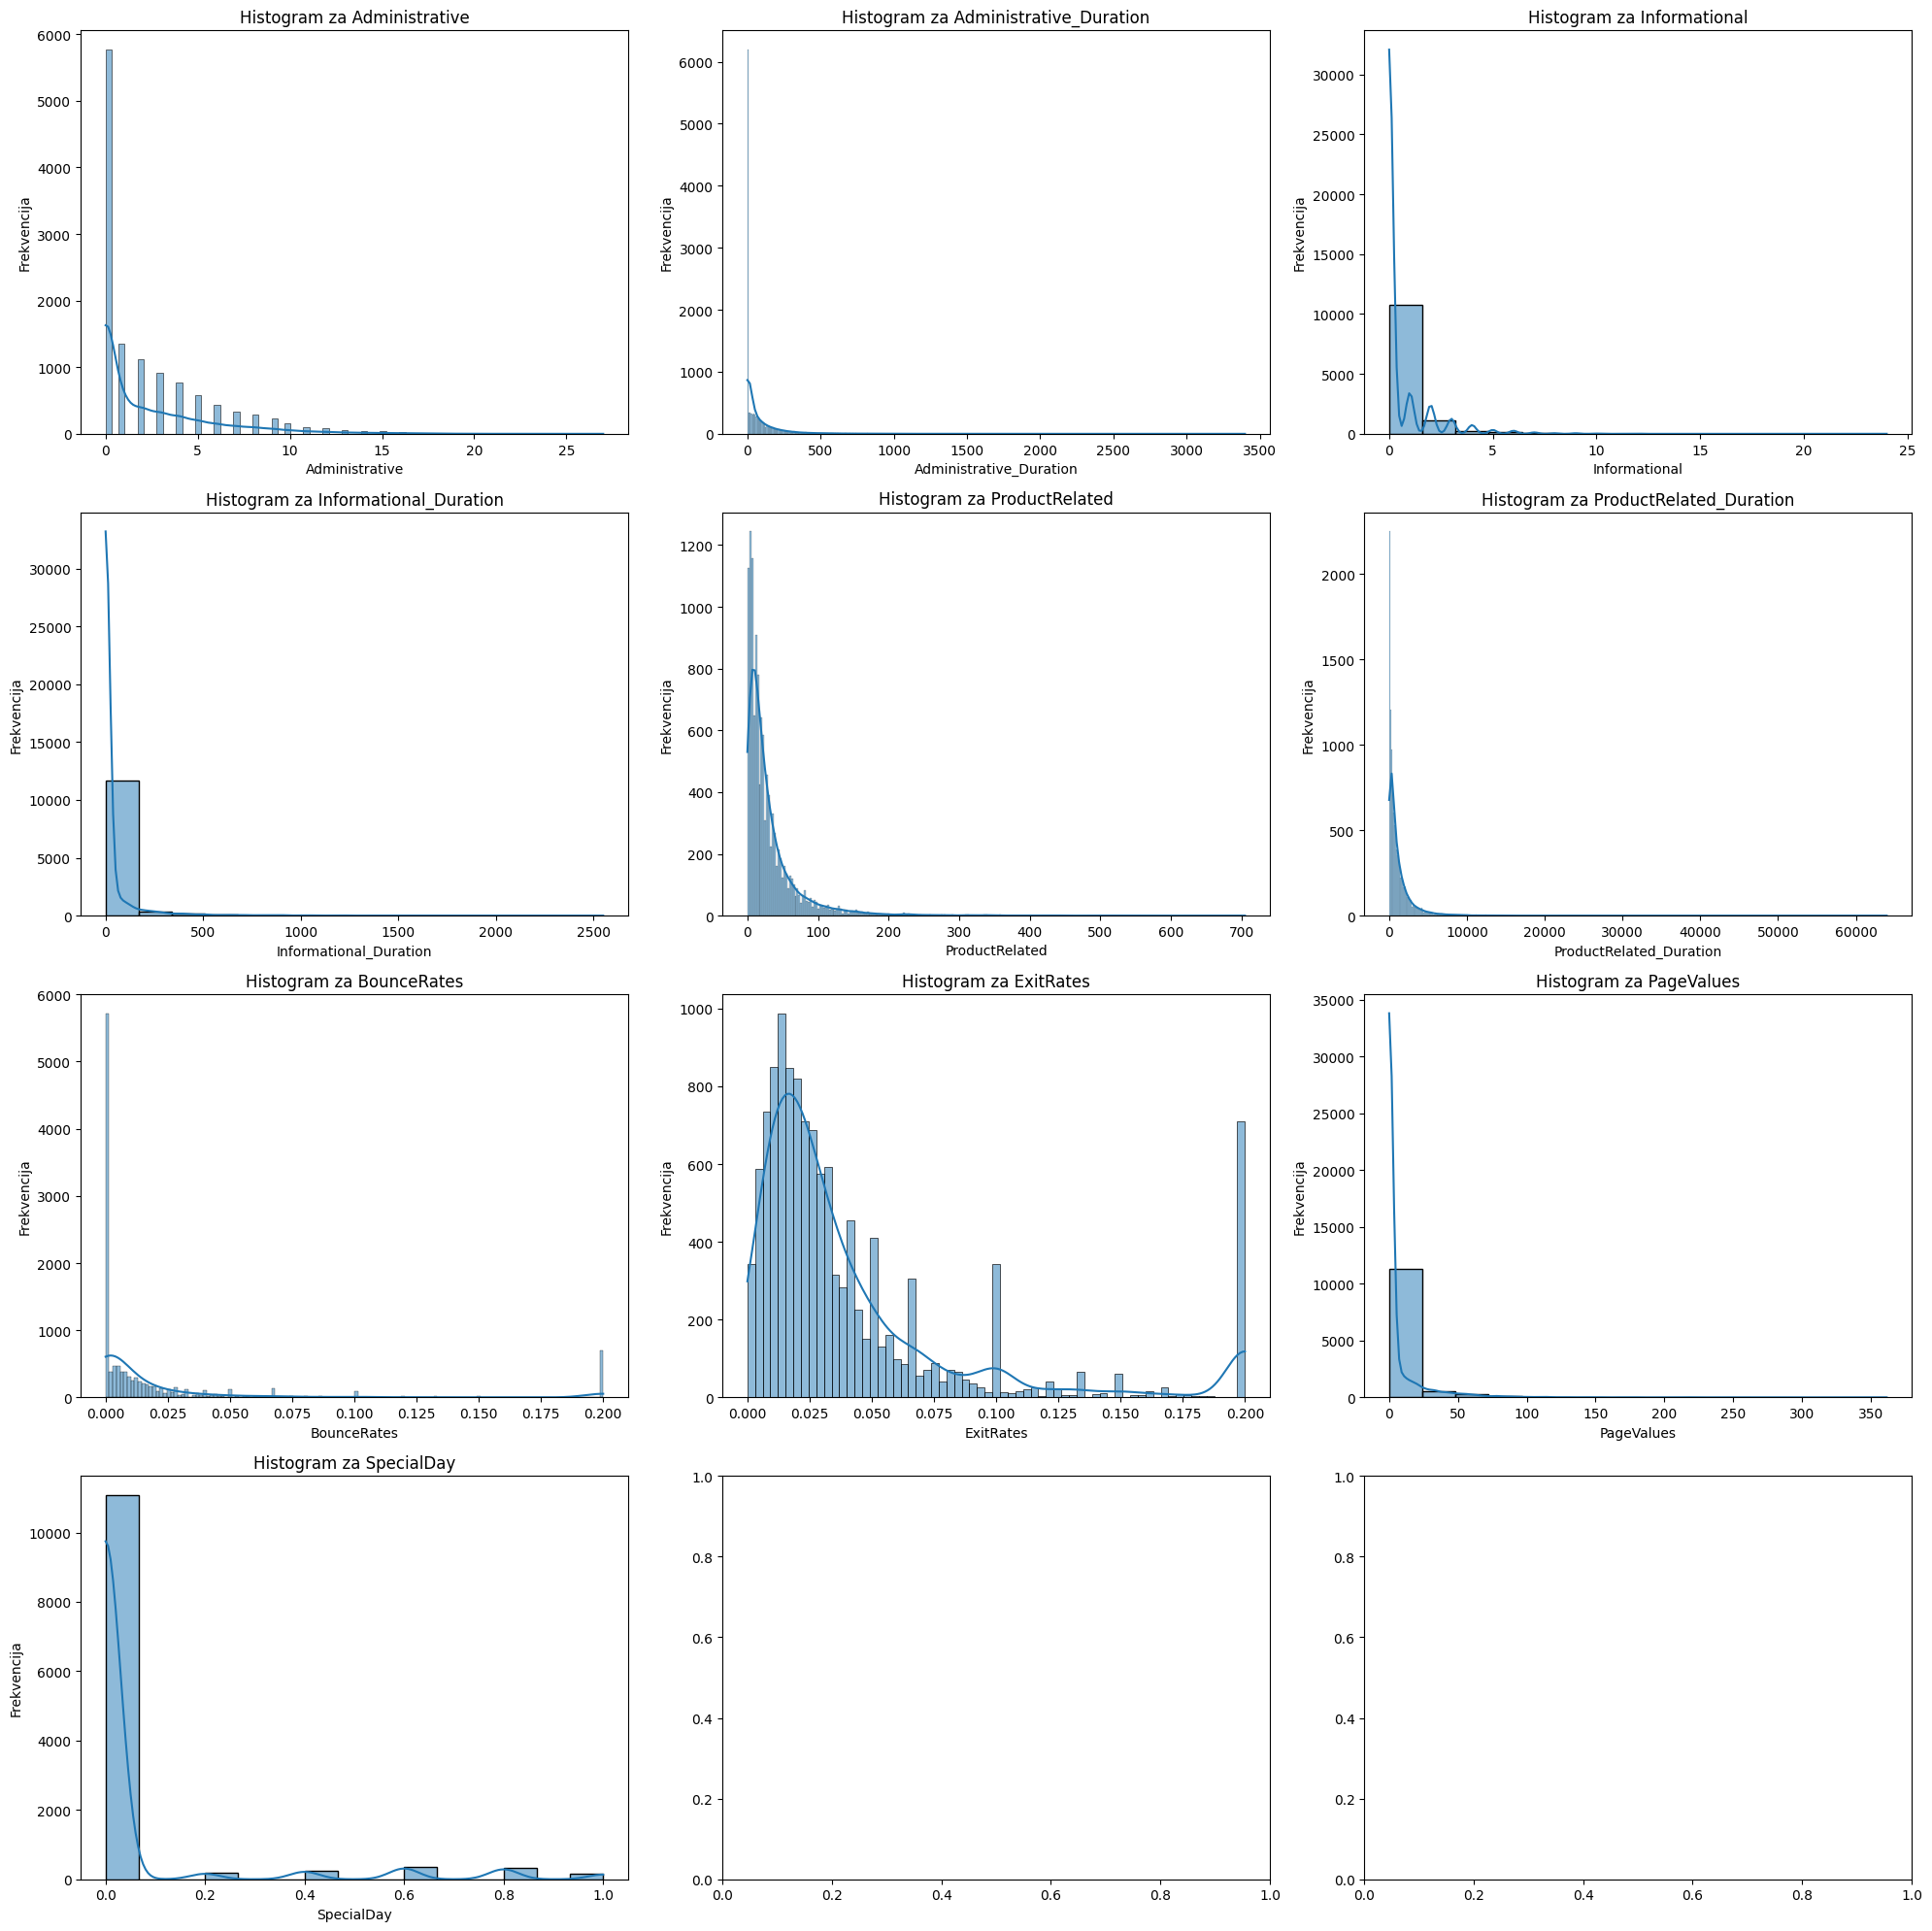

In [ ]:
# Histogrami za sve numeričke varijable
numerical_columns = data.select_dtypes(include='number').columns
fig, axes = plt.subplots(4, 3, figsize=(20, 20))

for i, varijabla in enumerate(numerical_columns):
    ax = axes.flat[i]
    sns.histplot(data[varijabla], ax=ax, kde=True)
    ax.set_title(f'Histogram za {varijabla}')
    ax.set_xlabel(varijabla)
    ax.set_ylabel('Frekvencija')

plt.tight_layout()
plt.show()


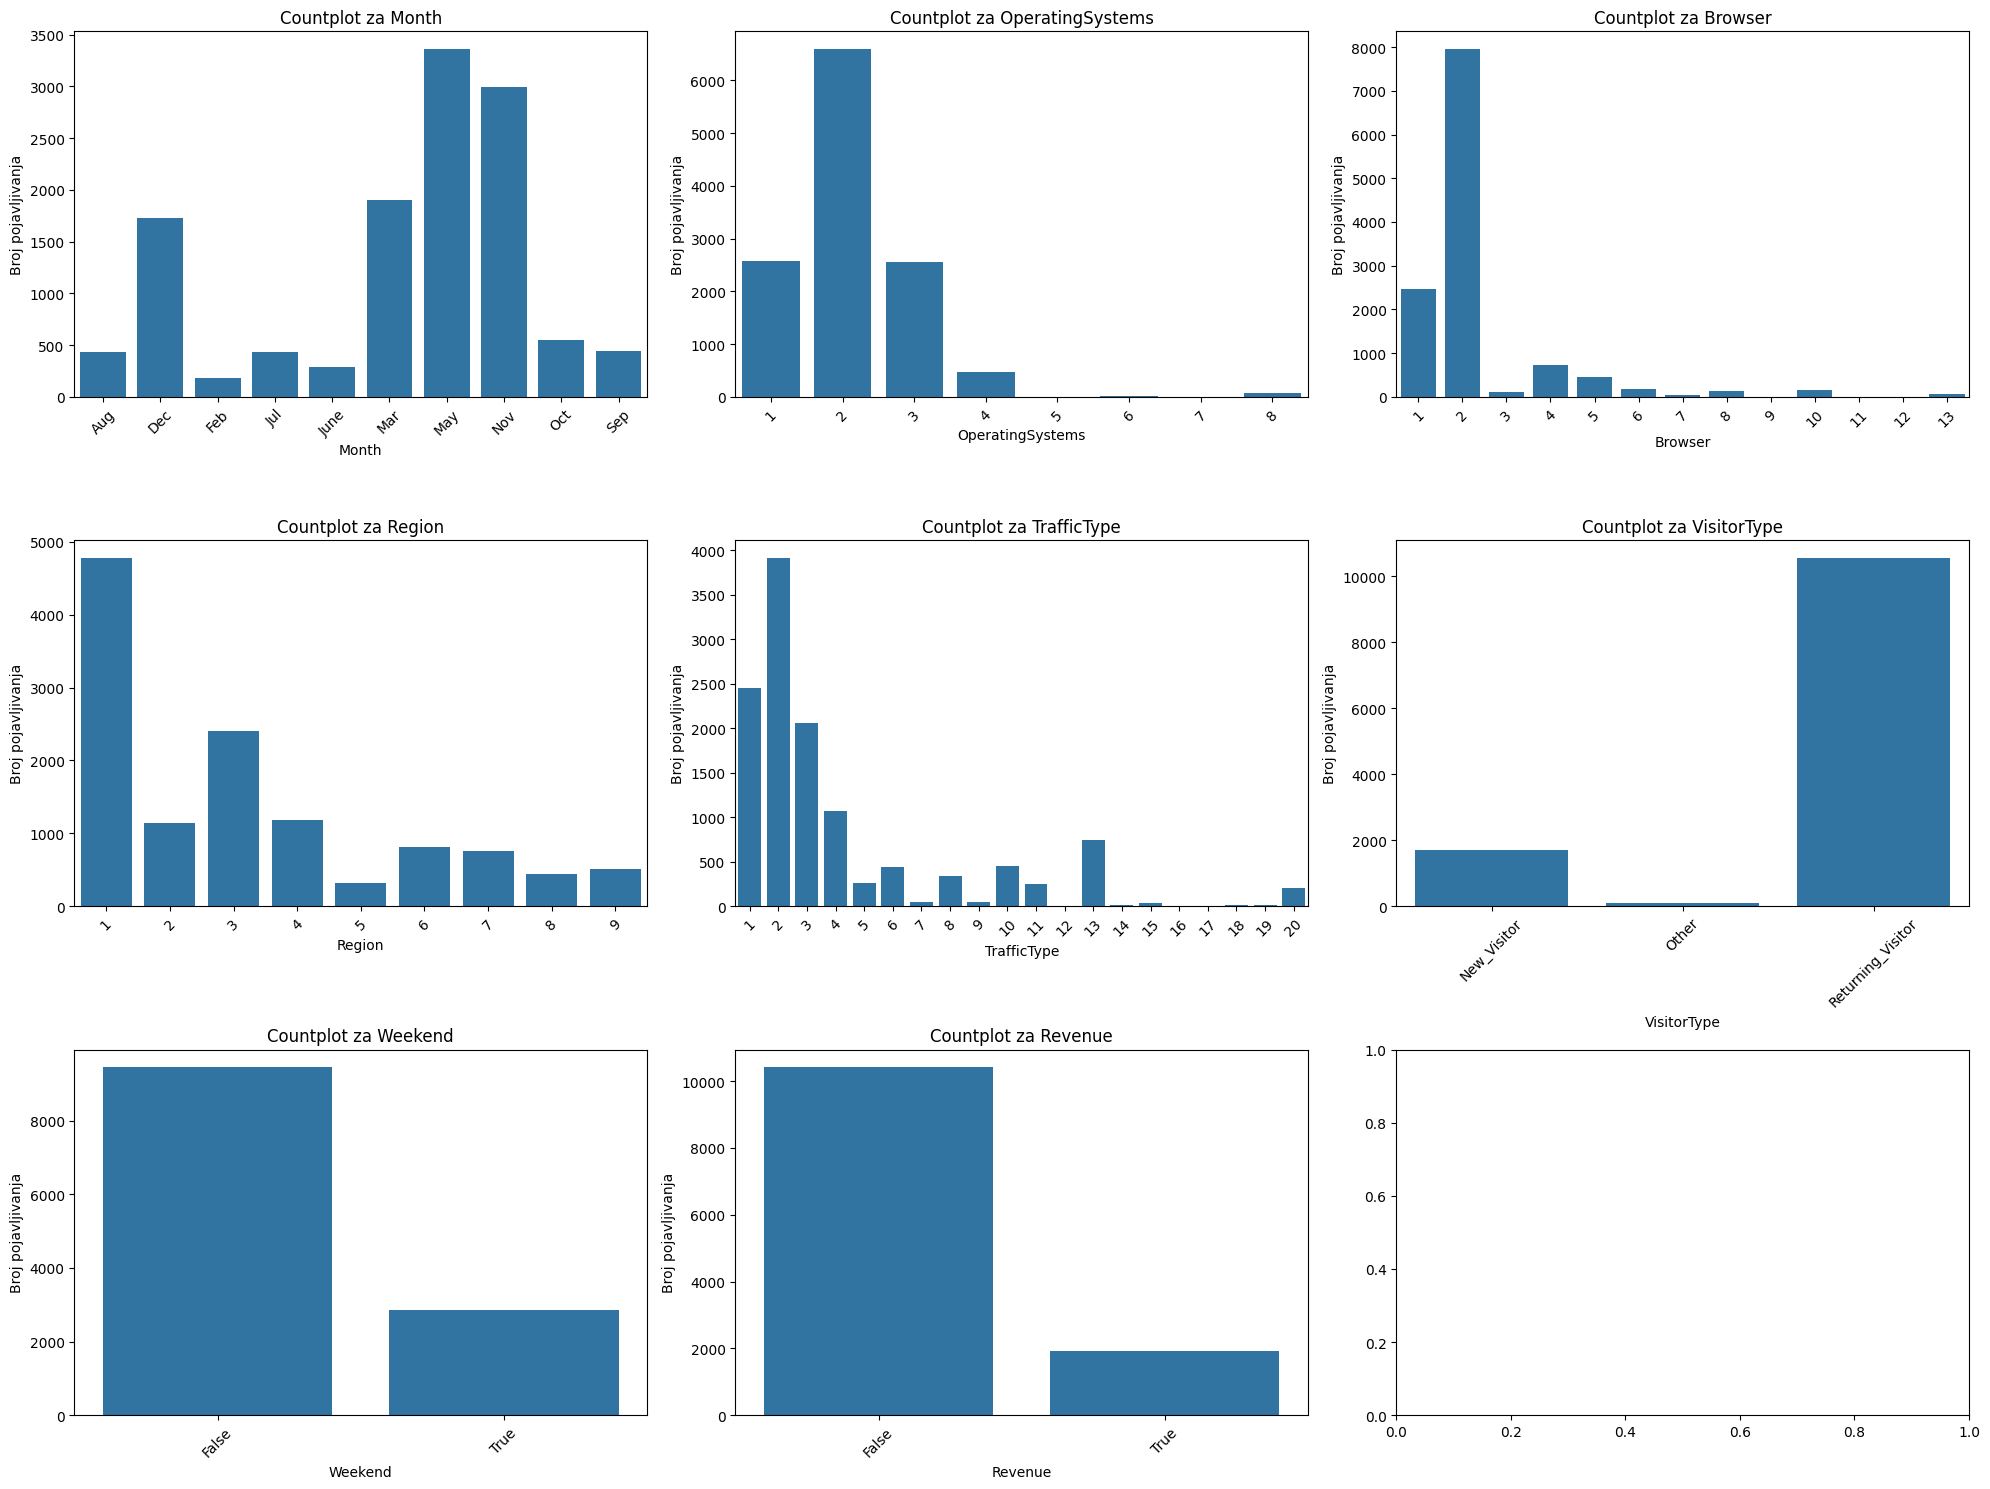

In [ ]:
# Countplot-ovi za sve kategorijske varijable
categorical_columns = data.select_dtypes(include='category').columns
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

for i, varijabla in enumerate(categorical_columns):
    ax = axes.flat[i]
    sns.countplot(data=data, x=varijabla, ax=ax)
    ax.set_title(f'Countplot za {varijabla}')
    ax.set_xlabel(varijabla)
    ax.set_ylabel('Broj pojavljivanja')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

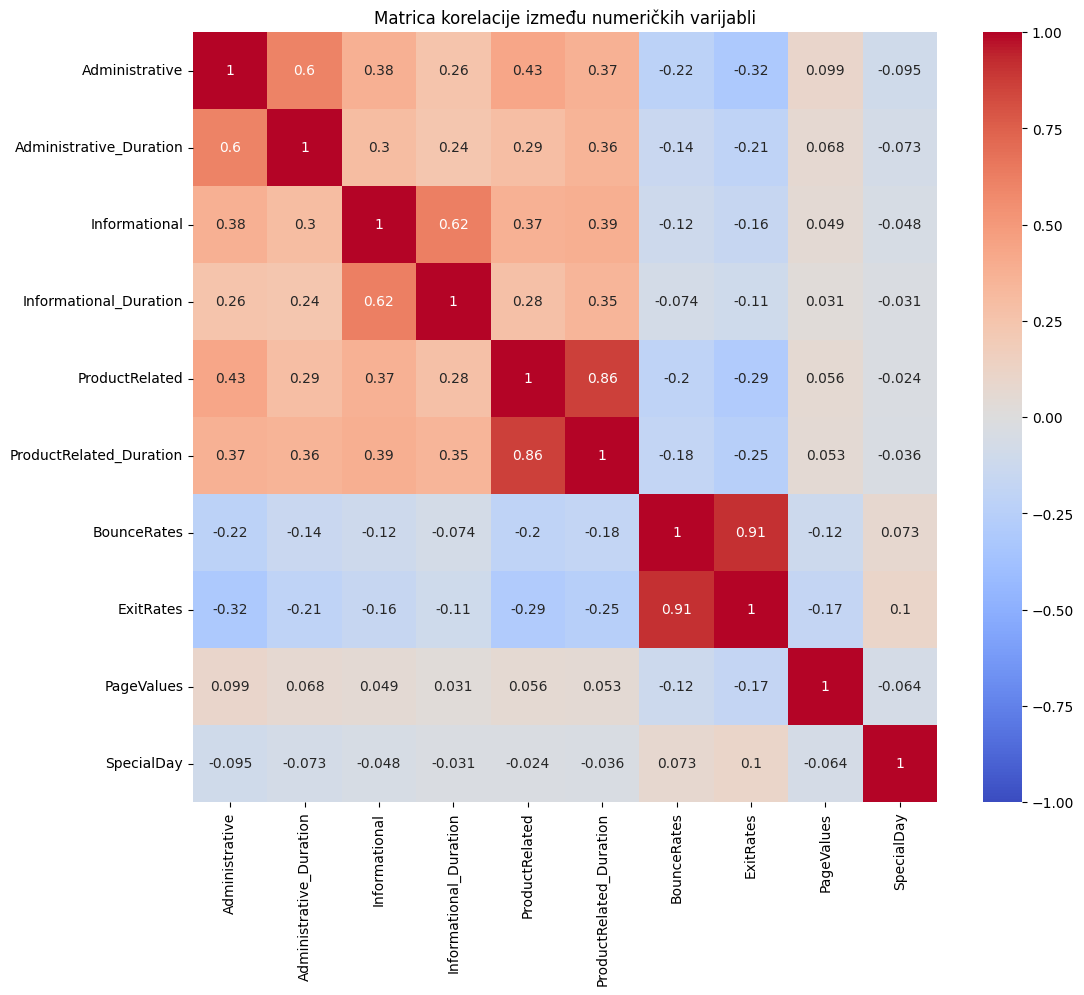

In [ ]:
# Izračun matrice korelacije
correlation_matrix = data.select_dtypes(include='number').corr()

# Prikaz matrice korelacije kao heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrica korelacije između numeričkih varijabli')
plt.show()


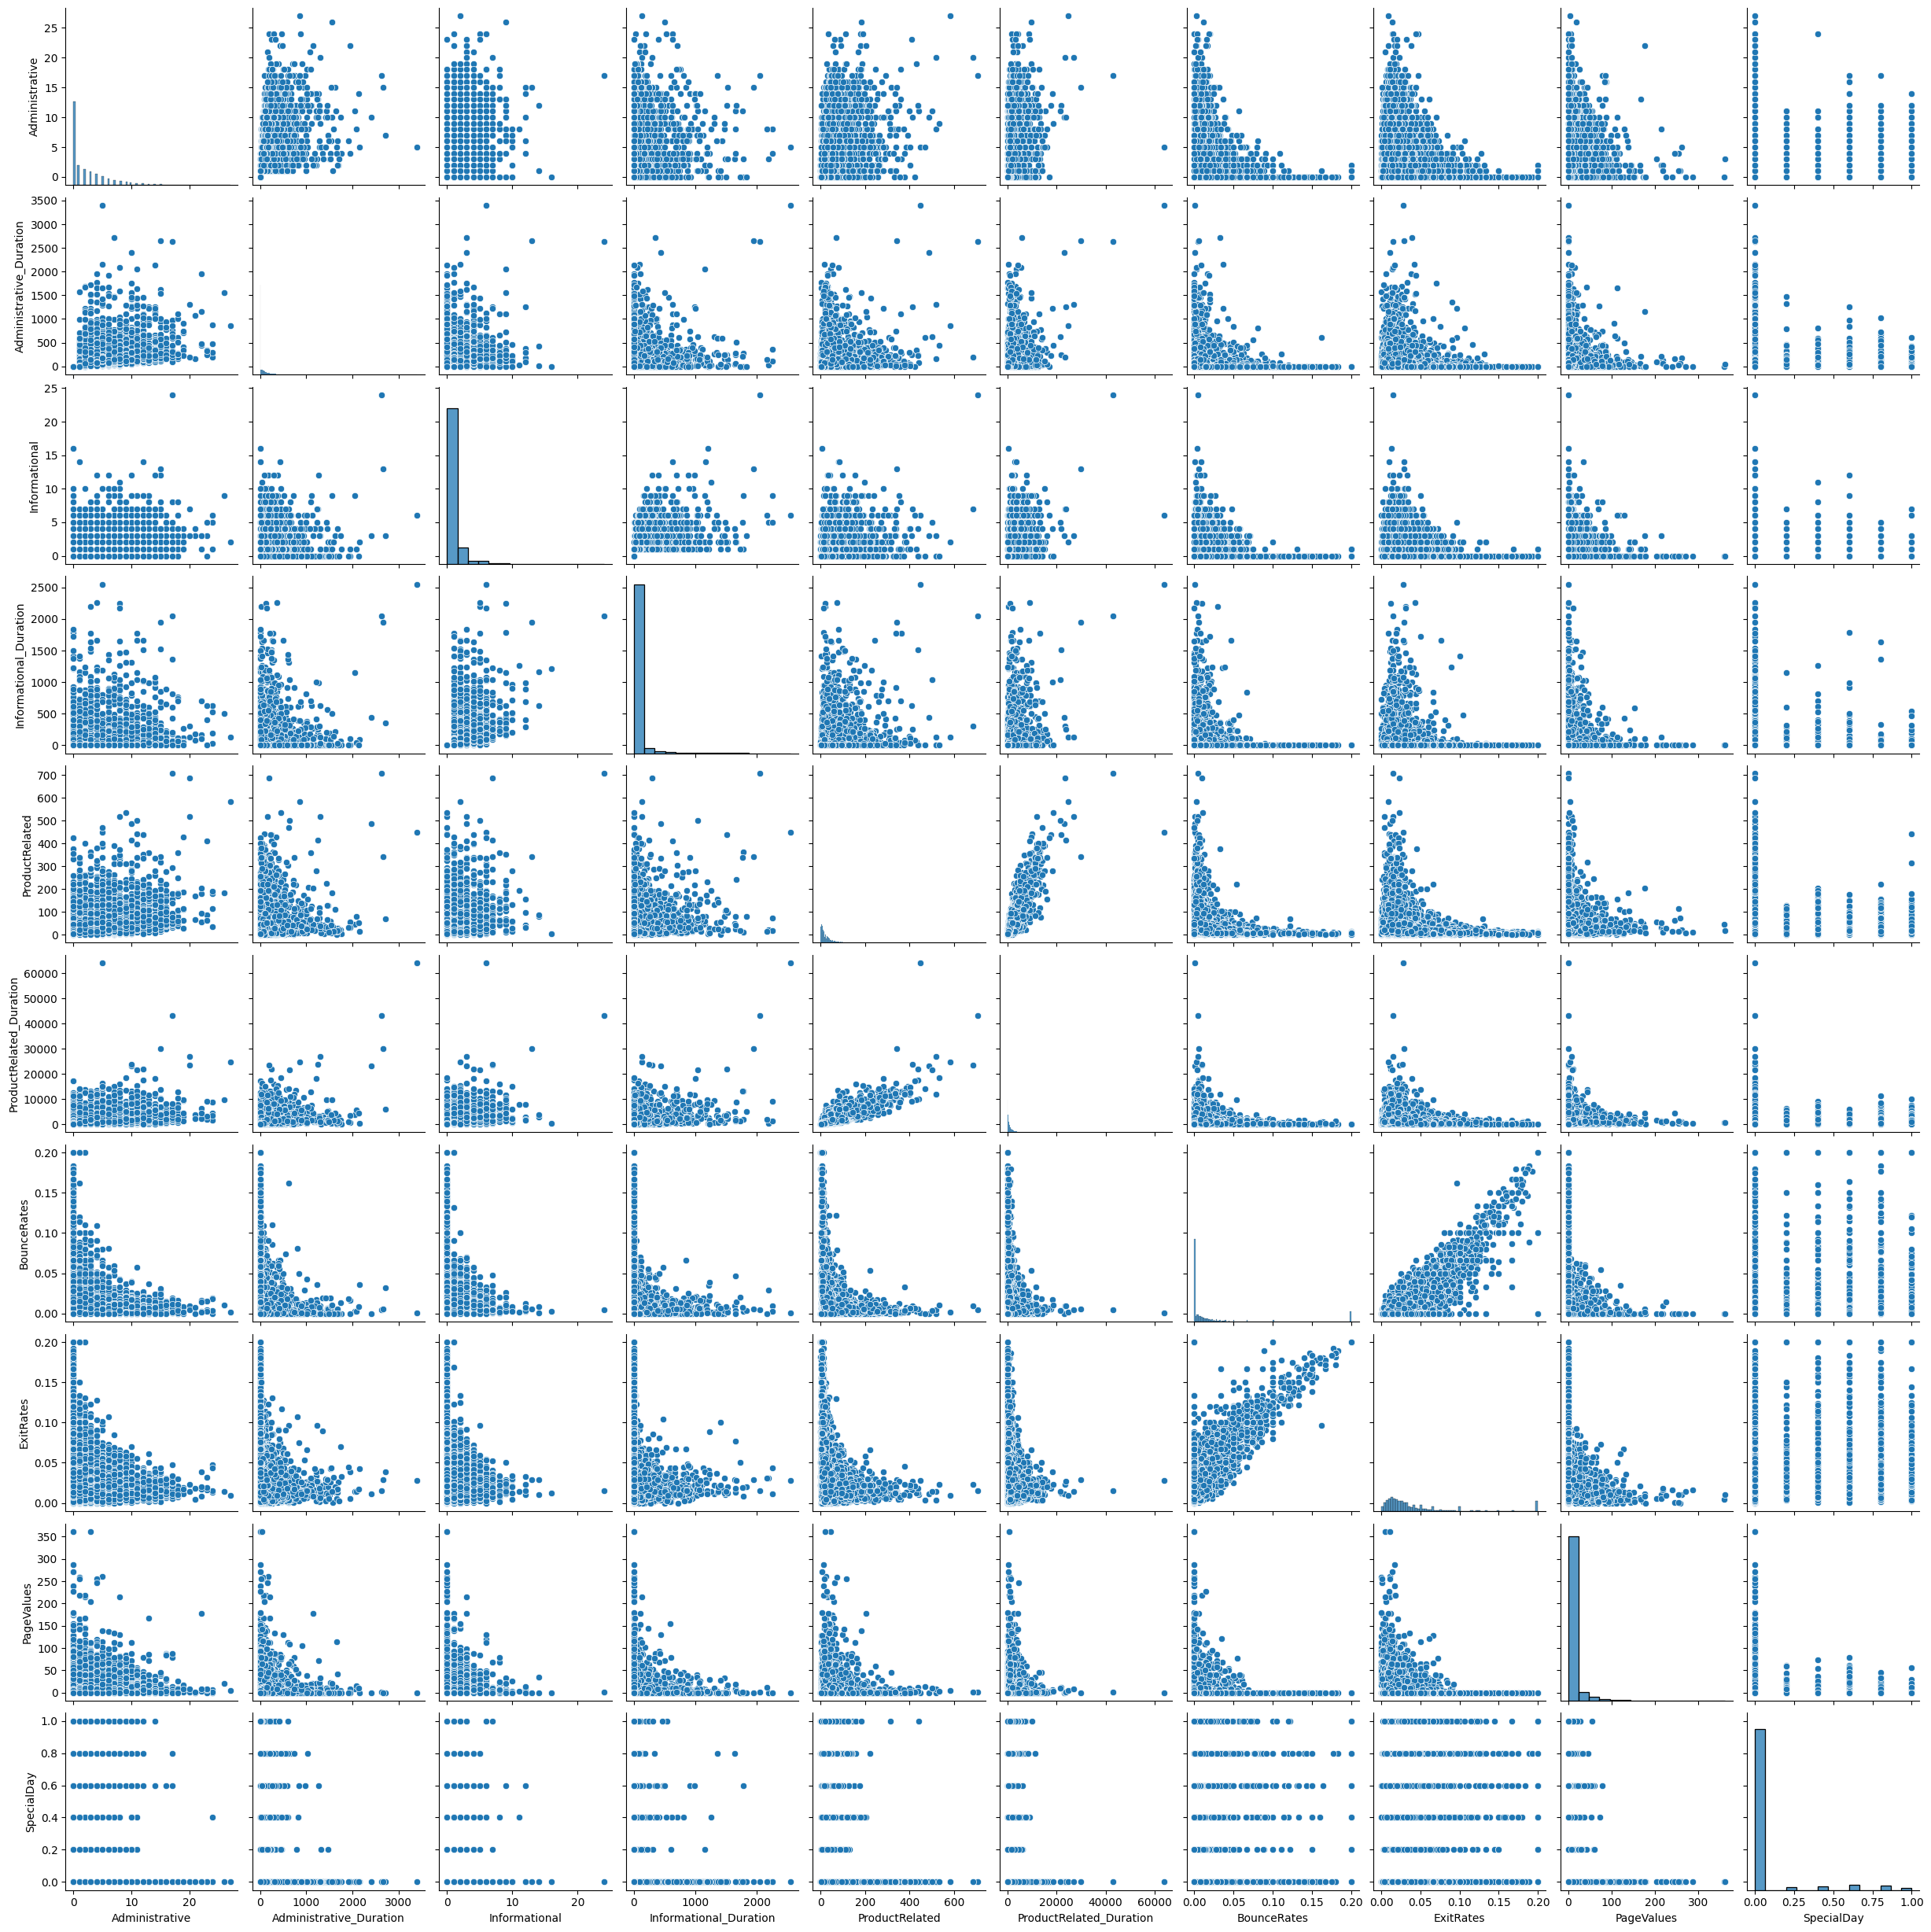

In [ ]:
# Scatter plot matrica
sns.pairplot(data.select_dtypes(include='number'))
plt.show()


Nedostajuće vrijednosti po stupcima:
Series([], dtype: int64)

Broj dupliciranih zapisa: 125


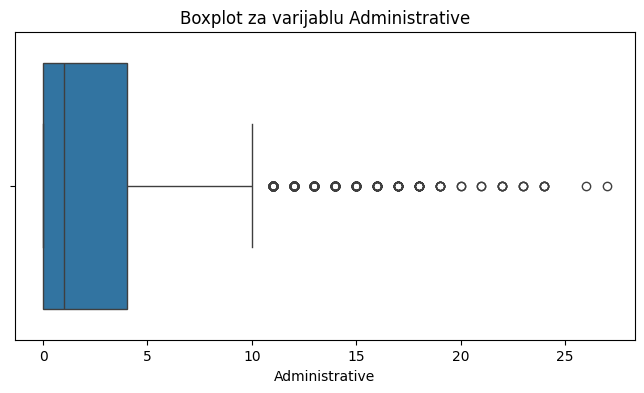

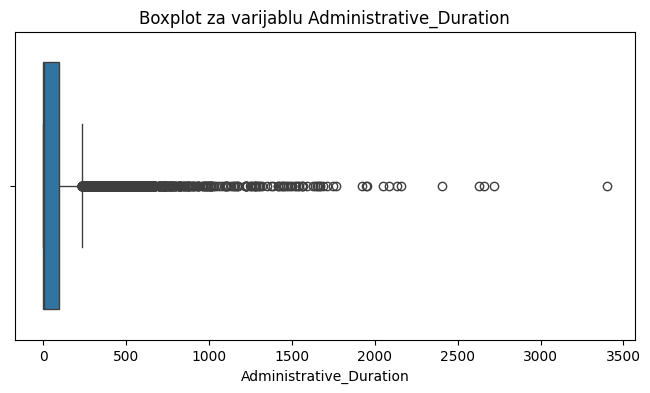

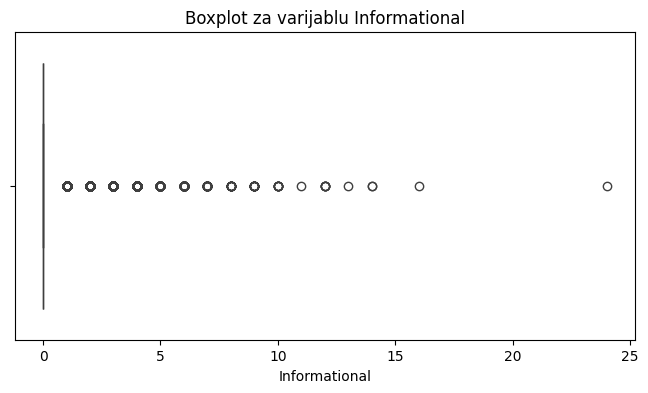

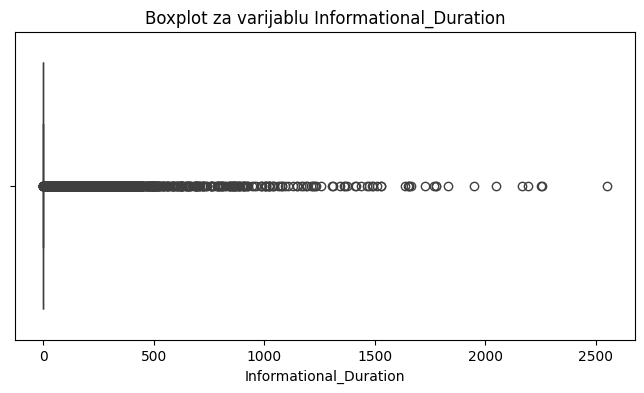

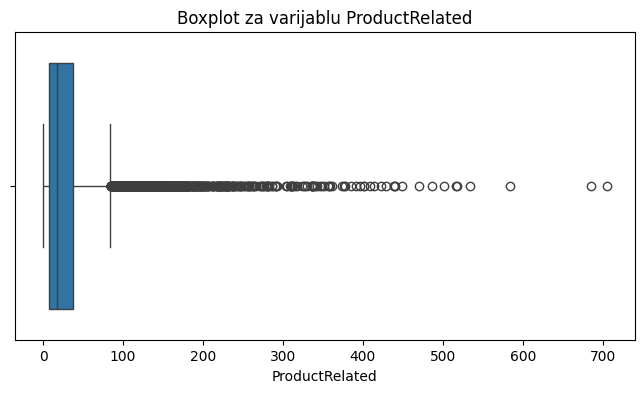

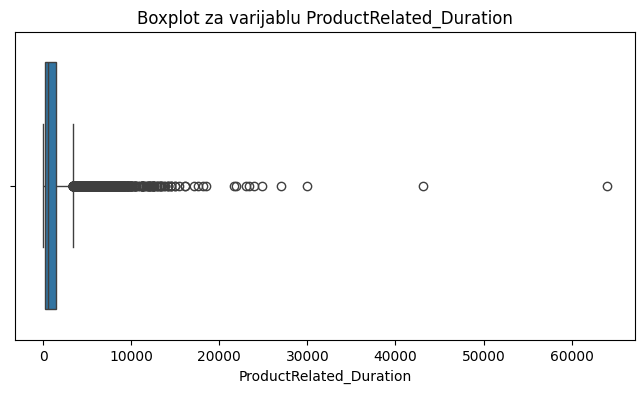

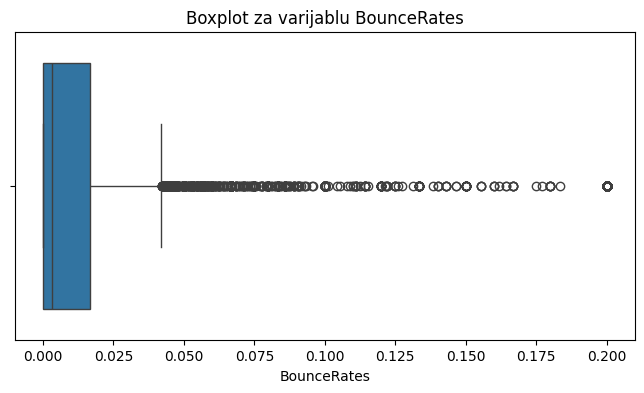

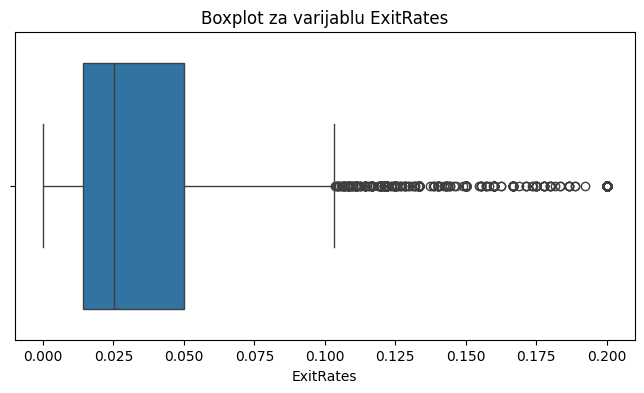

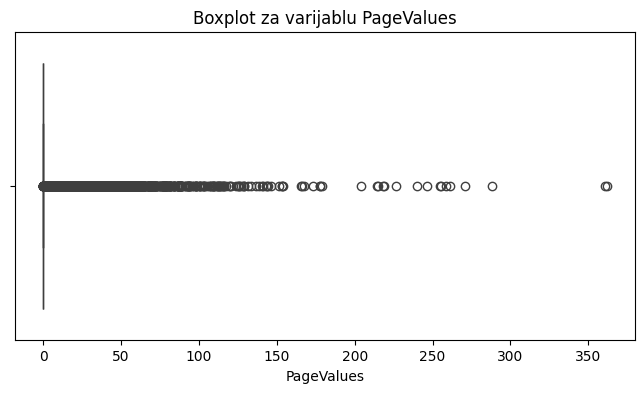

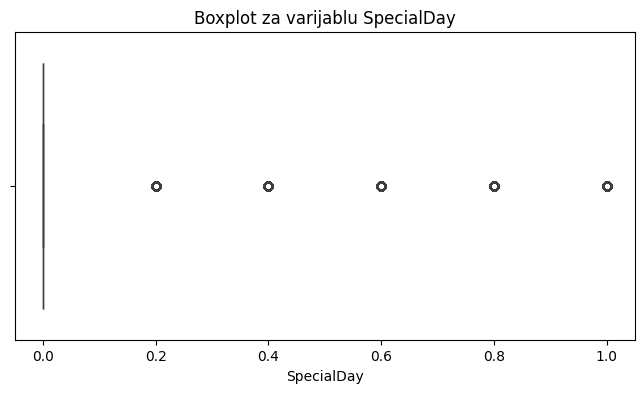

Administrative: 213
Administrative_Duration: 232
Informational: 260
Informational_Duration: 230
ProductRelated: 236
ProductRelated_Duration: 219
BounceRates: 708
ExitRates: 713
PageValues: 259
SpecialDay: 479


In [ ]:


# 1. Provjera nedostajućih vrijednosti
missing_values = data.isnull().sum()
print("Nedostajuće vrijednosti po stupcima:")
print(missing_values[missing_values > 0])

# 2. Provjera dupliciranih zapisa
duplicates = data.duplicated().sum()
print(f"\nBroj dupliciranih zapisa: {duplicates}")

# 3. Identifikacija ekstremnih vrijednosti (outliers)
# Primjena boxplota za identifikaciju outliera u numeričkim varijablama
numerical_columns = data.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot za varijablu {col}")
    plt.show()

# Metoda Z-score za identifikaciju outliera
from scipy import stats

outliers_count = {}
numerical_columns = data.select_dtypes(include=[np.number]).columns

for col in numerical_columns:
    z_scores = np.abs(stats.zscore(data[col].dropna()))  # Računanje Z-score vrijednosti
    outliers_count[col] = np.sum(z_scores > 3)  # Brojanje outliera koji su izvan 3 standardne devijacije

for col, count in outliers_count.items():
    print(f"{col}: {count}")


# Deskriptivno modeliranje (klasteriranje):

## Priprema podataka

### **Uklanjanje dupliciranih podatkovnih točaka**

In [ ]:
#OG -> K = 2: Silhouette score = 0.2992 K = 3: Silhouette score = 0.2855
#columns_to_drop = ['ProductRelated'] # K = 2: Silhouette score = 0.2711 K = 3: Silhouette score = 0.2860
#columns_to_drop = ['ExitRates'] #K = 2: Silhouette score = 0.3233 K = 3: Silhouette score = 0.1472
#columns_to_drop = ['ProductRelated', 'ExitRates'] # K = 2: Silhouette score = 0.3059 , K = 3: Silhouette score = 0.2418
#columns_to_drop = ['Administrative'] # K = 2: Silhouette score = 0.3261 K = 3: Silhouette score = 0.3081
#columns_to_drop = ['Informational'] # K = 2: Silhouette score = 0.2587 K = 3: Silhouette score = 0.2817
#columns_to_drop = ['Informational', 'ProductRelated', 'Administrative'] # K = 2: Silhouette score = 0.3373 K = 3: Silhouette score = 0.2552
#columns_to_drop = ['Informational', 'ProductRelated', 'Administrative', 'ExitRates'] #K = 2: Silhouette score = 0.3273 K = 3: Silhouette score = 0.2515
#columns_to_drop = ['Administrative', 'Informational'] #K = 2: Silhouette score = 0.3022 K = 3: Silhouette score = 0.2341
#columns_to_drop = ['Administrative', 'TrafficType'] # K = 2: Silhouette score = 0.2225 K = 3: Silhouette score = 0.2466
#columns_to_drop = ['Administrative', 'Informational', 'TrafficType'] # K = 2: Silhouette score = 0.3278 K = 3: Silhouette score = 0.3406
#columns_to_drop = ['Administrative', 'Informational', 'TrafficType', 'Browser'] # K = 2: Silhouette score = 0.3395 K = 3: Silhouette score = 0.3576
#columns_to_drop = ['Administrative', 'Informational', 'TrafficType', 'Browser', 'Region'] #K = 2: Silhouette score = 0.3690 K = 3: Silhouette score = 0.3723
#columns_to_drop = ['Administrative', 'Informational', 'TrafficType', 'Browser', 'Region', 'OperatingSystems'] #K = 2: Silhouette score = 0.2751 K = 3: Silhouette score = 0.3503
#columns_to_drop = ['Administrative', 'Informational','ProductRelated', 'TrafficType', 'Browser', 'Region'] # K = 2: Silhouette score = 0.3608 K = 3: Silhouette score = 0.3090
#columns_to_drop = ['Administrative','ProductRelated', 'TrafficType', 'Browser', 'Region'] #K = 2: Silhouette score = 0.2970 K = 3: Silhouette score = 0.3262
#columns_to_drop = ['Administrative','Informational', 'TrafficType', 'Browser', 'Region', 'ExitRates'] #K = 2: Silhouette score = 0.3998 K = 3: Silhouette score = 0.3433
#columns_to_drop = ['Administrative','Informational', 'TrafficType', 'Browser', 'Region', 'BounceRates'] #K = 2: Silhouette score = 0.3931 K = 3: Silhouette score = 0.3154
#columns_to_drop = ['TrafficType', 'Browser', 'Region'] #K = 2: Silhouette score = 0.2572 K = 3: Silhouette score = 0.3359
#columns_to_drop = ['TrafficType', 'Browser', 'Region','OperatingSystems'] #  K = 2: Silhouette score = 0.3660 K = 3: Silhouette score = 0.3085
#columns_to_drop = ['Informational', 'TrafficType', 'Browser', 'Region'] # K = 2: Silhouette score = 0.2798 K = 3: Silhouette score = 0.3298
#columns_to_drop = []

columns_to_drop = ['Administrative', 'Informational', 'TrafficType', 'Browser', 'Region']


# Izbacivanje odabranih kolona
data = data.drop(columns=columns_to_drop)

data.drop_duplicates(keep='first', inplace=True)

# Provjera dupliciranih zapisa nakon uklanjanja
duplicates = data.duplicated().sum()
print(f"\nBroj dupliciranih zapisa: {duplicates}")

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Provjera i rješavanje eventualnih NaN vrijednosti u numeričkim stupcima
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())


Broj dupliciranih zapisa: 0


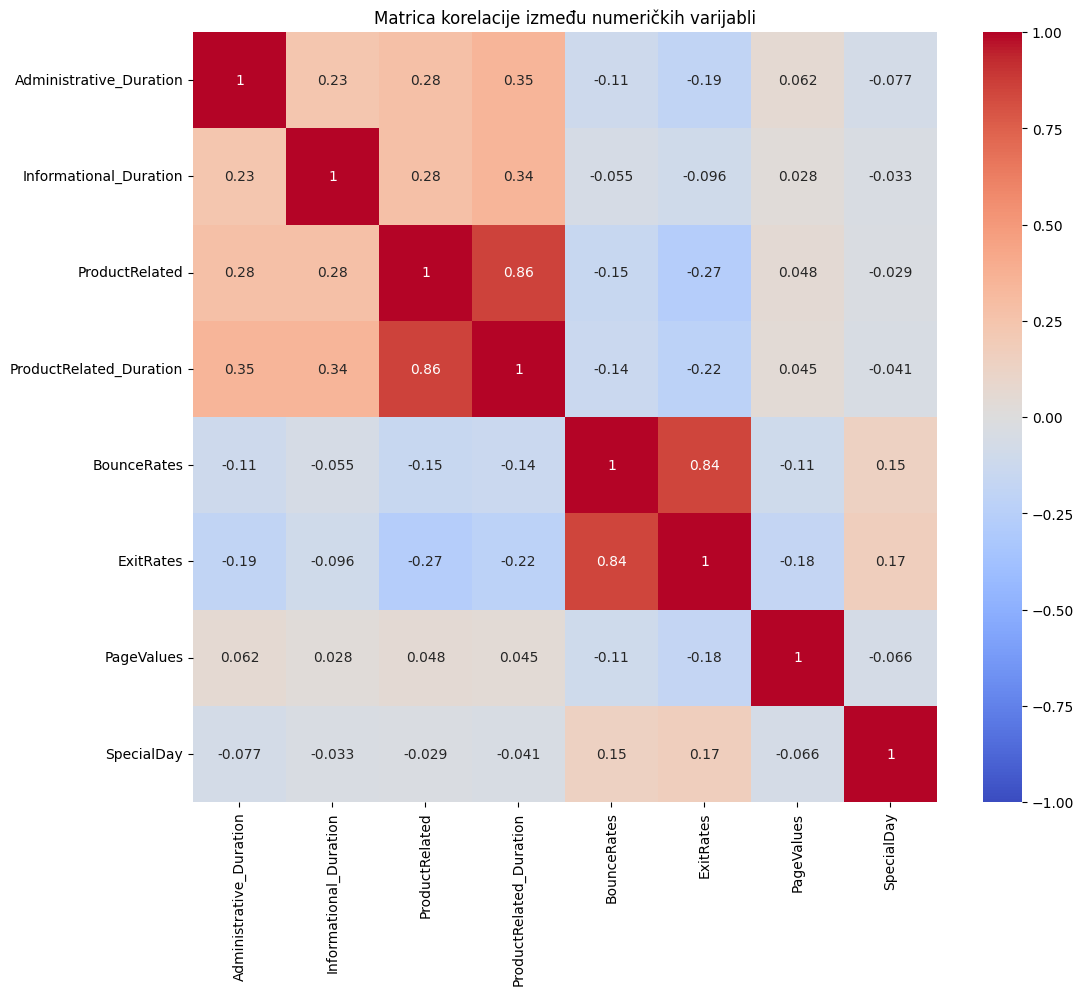

In [ ]:
# Izračun matrice korelacije
correlation_matrix = data.select_dtypes(include='number').corr()

# Prikaz matrice korelacije kao heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrica korelacije između numeričkih varijabli')
plt.show()

### **Kodiranje kategorijskih atributa**

In [ ]:
# Pretvaranje kategoričkih značajki u binarne
data = pd.get_dummies(data, dtype=int)

#data = pd.get_dummies(data)

data.head()

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month_Aug,Month_Dec,...,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True,Revenue_False,Revenue_True
0,0.0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0,0,...,0,0,0,0,0,1,1,0,1,0
1,0.0,0.0,2,64.000000,0.00,0.10,0.0,0.0,0,0,...,0,0,0,0,0,1,1,0,1,0
2,0.0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0,0,...,0,0,0,0,0,1,1,0,1,0
3,0.0,0.0,2,2.666667,0.05,0.14,0.0,0.0,0,0,...,0,0,0,0,0,1,1,0,1,0
4,0.0,0.0,10,627.500000,0.02,0.05,0.0,0.0,0,0,...,0,0,0,0,0,1,0,1,1,0


### **Skaliranje atributa**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_data = scaler.fit_transform(data[numerical_columns])

# Pretvaranje skaliranih podataka u DataFrame s originalnim nazivima stupaca
scaled_data = pd.DataFrame(scaled_data, columns=numerical_columns)

# Izdvajanje preostalih kategorijskih stupaca (koji nisu skalirani)
encoded_features = data.drop(columns=numerical_columns)

# Kombiniranje skaliranih numeričkih podataka s netaknutim kategorijskim stupcima
final_data = pd.concat([scaled_data, encoded_features.reset_index(drop=True)], axis=1)

print(final_data.head())

   Administrative_Duration  Informational_Duration  ProductRelated  \
0                -0.468901               -0.250404       -0.712566   
1                -0.468901               -0.250404       -0.690320   
2                -0.468901               -0.250404       -0.712566   
3                -0.468901               -0.250404       -0.690320   
4                -0.468901               -0.250404       -0.512350   

   ProductRelated_Duration  BounceRates  ExitRates  PageValues  SpecialDay  \
0                -0.642829     5.640861   4.393193   -0.324547   -0.311988   
1                -0.609799    -0.450726   1.706731   -0.324547   -0.311988   
2                -0.642829     5.640861   4.393193   -0.324547   -0.311988   
3                -0.641453     1.072171   2.781316   -0.324547   -0.311988   
4                -0.318975     0.158432   0.363500   -0.324547   -0.311988   

   Month_Aug  Month_Dec  ...  OperatingSystems_6  OperatingSystems_7  \
0          0          0  ...          

## Klasteriranje

In [ ]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN

### Metoda lakta za pronalaženje optimalnog broja klastera u K-means

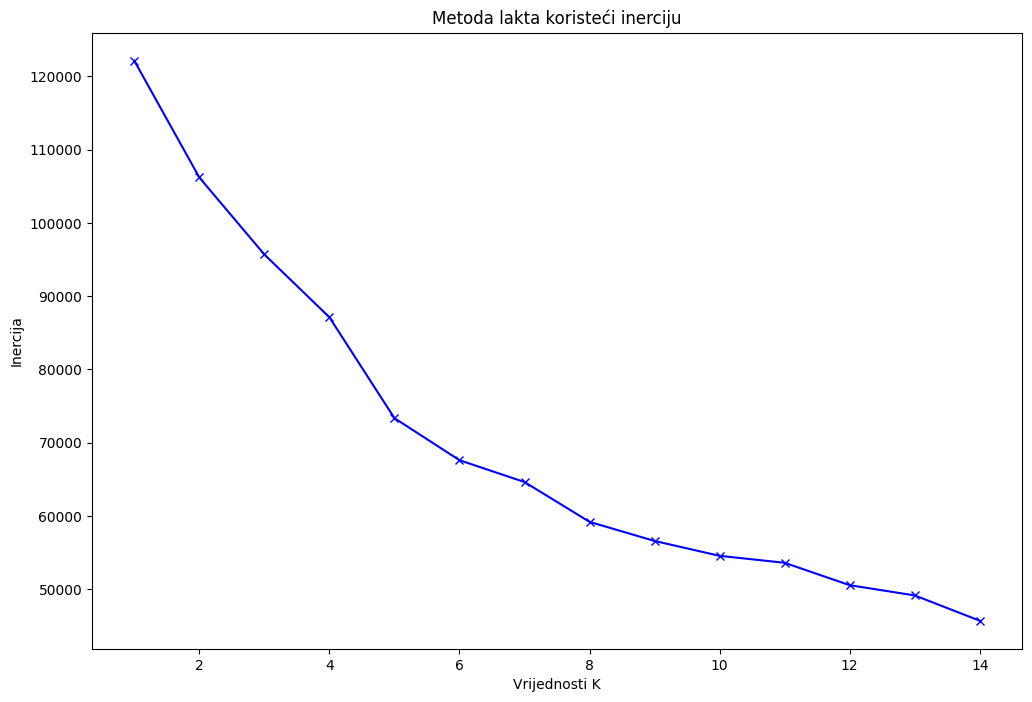

In [ ]:
# Metoda lakta za odabir parametra K

inertia = []  # Inicijalizira se prazan popis za spremanje vrijednosti inercije za svaki broj klastera K
range_val = range(1, 15)  # Definira raspon broja klastera K koje ćemo isprobati (od 1 do 14)

for i in range_val:
    kmean = KMeans(n_clusters=i)  # Kreira K-means model za određeni broj klastera (i)
    kmean.fit(final_data)  # Treniranje K-means modela na skupu podataka customer_scaled_df
    inertia.append(kmean.inertia_)  # Dodavanje inercije za broj klastera i u popis

# Prikaz grafa metode lakta
plt.figure(figsize=(12, 8))
plt.plot(range_val, inertia, 'bx-')
plt.xlabel('Vrijednosti K')
plt.ylabel('Inercija')
plt.title('Metoda lakta koristeći inerciju')
plt.show()


- Iz gornjeg grafa vidimo da je **K = 3** najbolja K vrijednost za klasteriranje. Kako bi se dodatno uvjerili koristili smo algoritam koji bi provjeravao Silhouette rezultat za svaki K od 2 do 14.

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

range_val = range(2, 15)
silhouette_scores = []

print("Silhouette score za svaku vrijednost K:")
for k in range_val:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(final_data)
    score = silhouette_score(final_data, clusters)
    silhouette_scores.append(score)
    print(f'K = {k}: Silhouette score = {score:.4f}')

# Prikaz optimalnog K s najvećim silhouette score-om
optimal_k = range_val[silhouette_scores.index(max(silhouette_scores))]
optimal_score = max(silhouette_scores)

print("\nOptimalni broj klastera prema Silhouette analizi:")
print(f'Optimalni K = {optimal_k} s Silhouette score = {optimal_score:.4f}')

Silhouette score za svaku vrijednost K:
K = 2: Silhouette score = 0.3690
K = 3: Silhouette score = 0.3723
K = 4: Silhouette score = 0.2972
K = 5: Silhouette score = 0.3006
K = 6: Silhouette score = 0.3220
K = 7: Silhouette score = 0.2563
K = 8: Silhouette score = 0.1315
K = 9: Silhouette score = 0.1340
K = 10: Silhouette score = 0.1617
K = 11: Silhouette score = 0.1630
K = 12: Silhouette score = 0.1644
K = 13: Silhouette score = 0.1641
K = 14: Silhouette score = 0.1590

Optimalni broj klastera prema Silhouette analizi:
Optimalni K = 3 s Silhouette score = 0.3723


Ovi rezultati pokazuju kako bi za broj klastera trebalo uzeti K=2 ili K=3.

Uzet ćemo K=3.

### Izrada modela za cijeli dataset

In [ ]:
# K-means klasteriranje
kmeans_model=KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=20, random_state=42)
kmeans_clusters = kmeans_model.fit_predict(final_data)

from sklearn.metrics import silhouette_score

# Ispisivanje Silhouette ocjene
print(f'KMeans Silhouette score: {silhouette_score(final_data, kmeans_clusters):.4f}')

KMeans Silhouette score: 0.3728


### Administrative_Duration i BounceRates

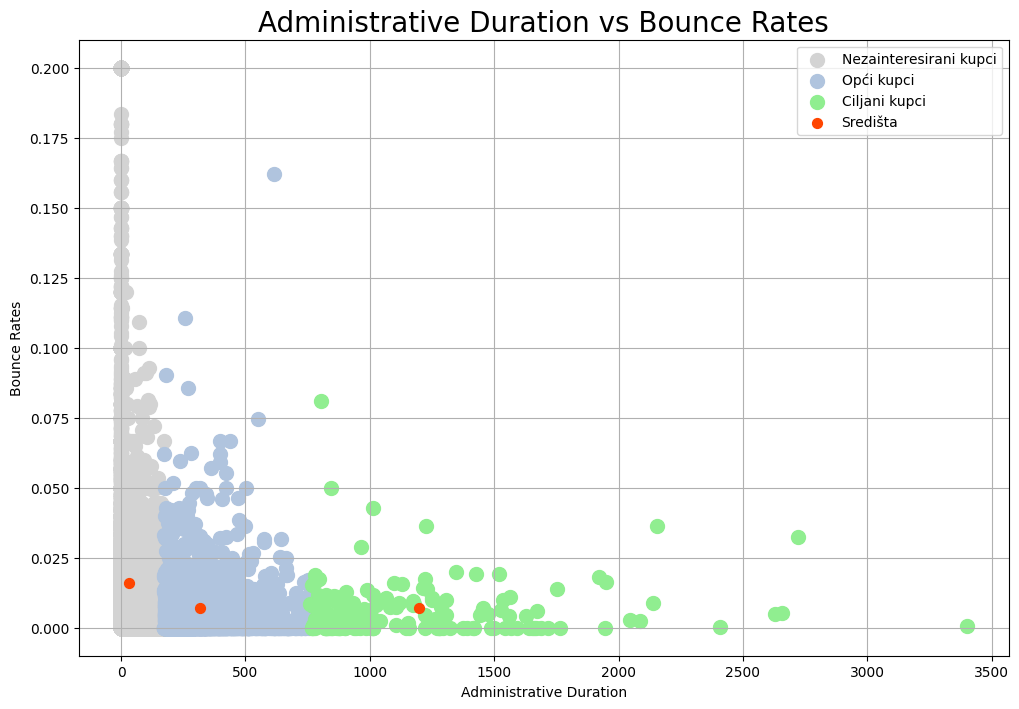

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = data.iloc[:, [0, 4]].values #Administrative Duration i Bounce Rates
km = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=20, random_state=42)
y_means = km.fit_predict(x)

centers = km.cluster_centers_
sorted_indices = np.argsort(centers[:, 0])  # Sort centroids by x-coordinate

# Create a mapping for labels
label_mapping = {original: new for new, original in enumerate(sorted_indices)}
y_means = np.array([label_mapping[label] for label in y_means])  # Reassign labels
km.cluster_centers_ = centers[sorted_indices]  # Sort centroids accordingly

plt.figure(figsize=(12, 8))

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=100, c='lightgray', label='Nezainteresirani kupci')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=100, c='lightsteelblue', label='Opći kupci')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s=100, c='lightgreen', label='Ciljani kupci')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=50, c='orangered', label='Središta')

plt.title('Administrative Duration vs Bounce Rates', fontsize=20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

### Informational_Duration i BounceRates

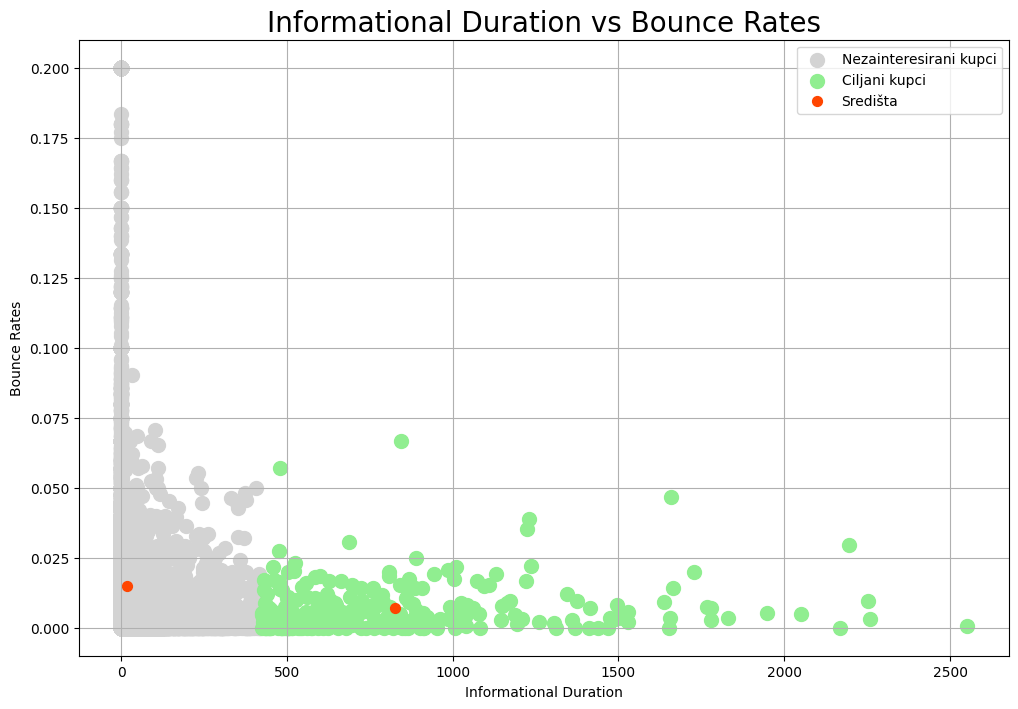

In [ ]:
x = data.iloc[:, [1, 4]].values #Informational Duration i Bounce Rates
km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=20, random_state=42)
y_means = km.fit_predict(x)

centers = km.cluster_centers_
sorted_indices = np.argsort(centers[:, 0])  # Sort centroids by x-coordinate

# Create a mapping for labels
label_mapping = {original: new for new, original in enumerate(sorted_indices)}
y_means = np.array([label_mapping[label] for label in y_means])  # Reassign labels
km.cluster_centers_ = centers[sorted_indices]  # Sort centroids accordingly

plt.figure(figsize=(12, 8))

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=100, c='lightgray', label='Nezainteresirani kupci')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=100, c='lightgreen', label='Ciljani kupci')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=50, c='orangered', label='Središta')

plt.title('Informational Duration vs Bounce Rates', fontsize = 20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

### ProductRelated_Duration i BounceRates

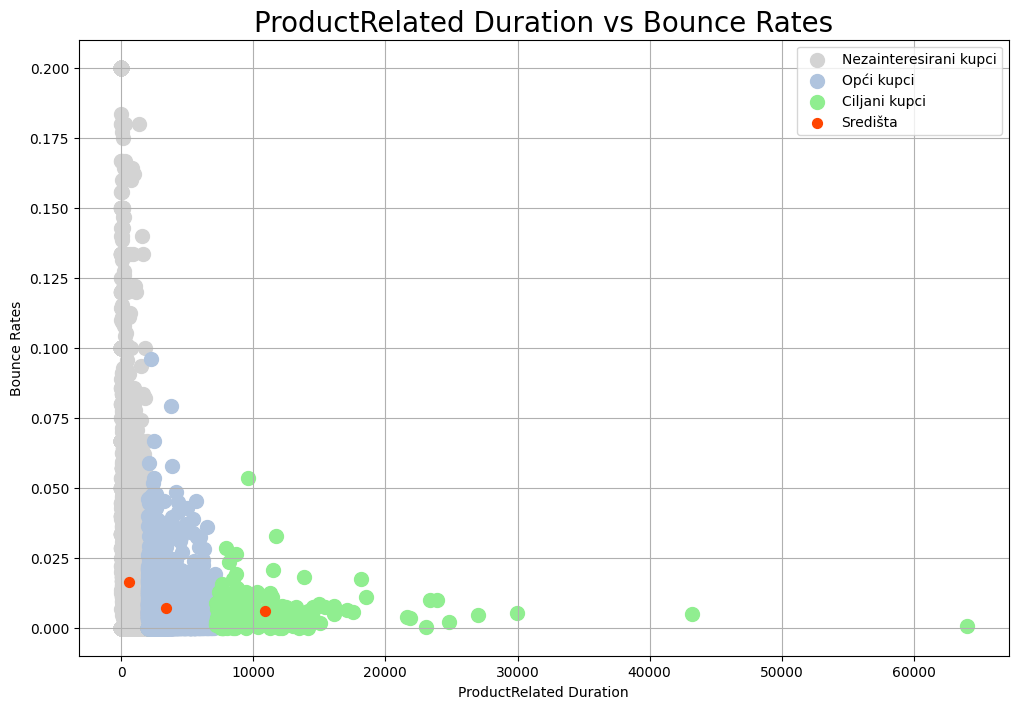

In [ ]:
x = data.iloc[:, [3, 4]].values #ProductRelated Duration i Bounce Rates
km = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=20, random_state=42)
y_means = km.fit_predict(x)

centers = km.cluster_centers_
sorted_indices = np.argsort(centers[:, 0])  # Sort centroids by x-coordinate

# Create a mapping for labels
label_mapping = {original: new for new, original in enumerate(sorted_indices)}
y_means = np.array([label_mapping[label] for label in y_means])  # Reassign labels
km.cluster_centers_ = centers[sorted_indices]  # Sort centroids accordingly

plt.figure(figsize=(12, 8))

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=100, c='lightgray', label='Nezainteresirani kupci')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=100, c='lightsteelblue', label='Opći kupci')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s=100, c='lightgreen', label='Ciljani kupci')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=50, c='orangered', label='Središta')

plt.title('ProductRelated Duration vs Bounce Rates', fontsize=20)
plt.grid()
plt.xlabel('ProductRelated Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

### ProductRelated_Duration i ExitRates

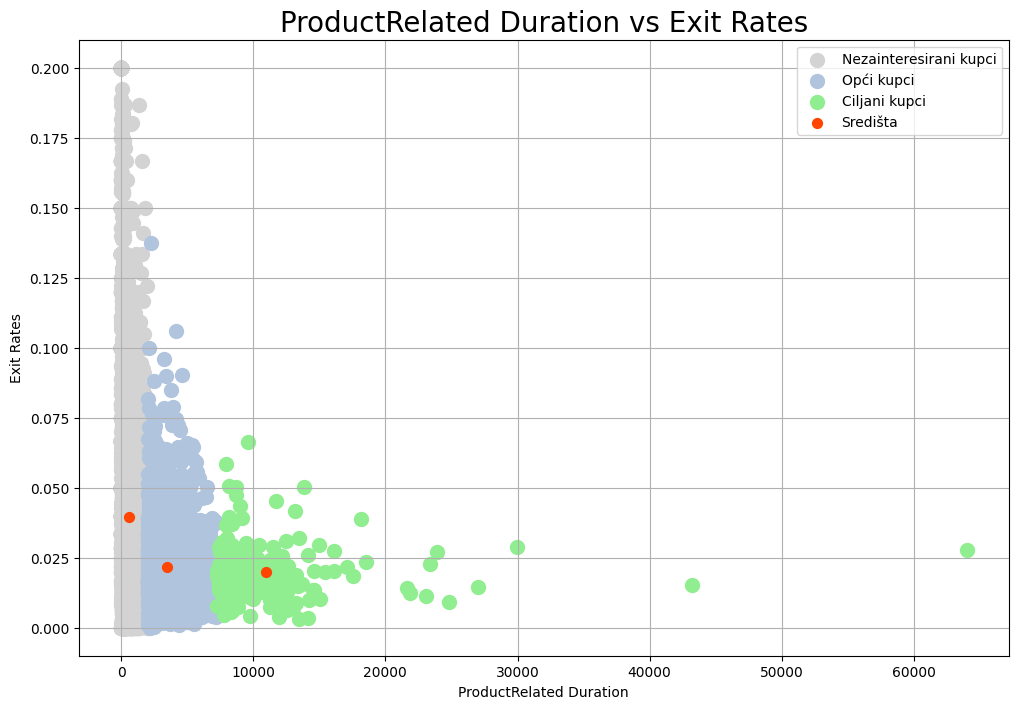

In [ ]:
x = data.iloc[:, [3, 5]].values #ProductRelated Duration i Exit Rates
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

centers = km.cluster_centers_
sorted_indices = np.argsort(centers[:, 0])  # Sort centroids by x-coordinate

# Create a mapping for labels
label_mapping = {original: new for new, original in enumerate(sorted_indices)}
y_means = np.array([label_mapping[label] for label in y_means])  # Reassign labels
km.cluster_centers_ = centers[sorted_indices]  # Sort centroids accordingly

plt.figure(figsize=(12, 8))

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=100, c='lightgray', label='Nezainteresirani kupci')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=100, c='lightsteelblue', label='Opći kupci')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s=100, c='lightgreen', label='Ciljani kupci')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=50, c='orangered', label='Središta')

plt.title('ProductRelated Duration vs Exit Rates', fontsize = 20)
plt.grid()
plt.xlabel('ProductRelated Duration')
plt.ylabel('Exit Rates')
plt.legend()
plt.show()

### ProductRelated_Duration i SpecialDay

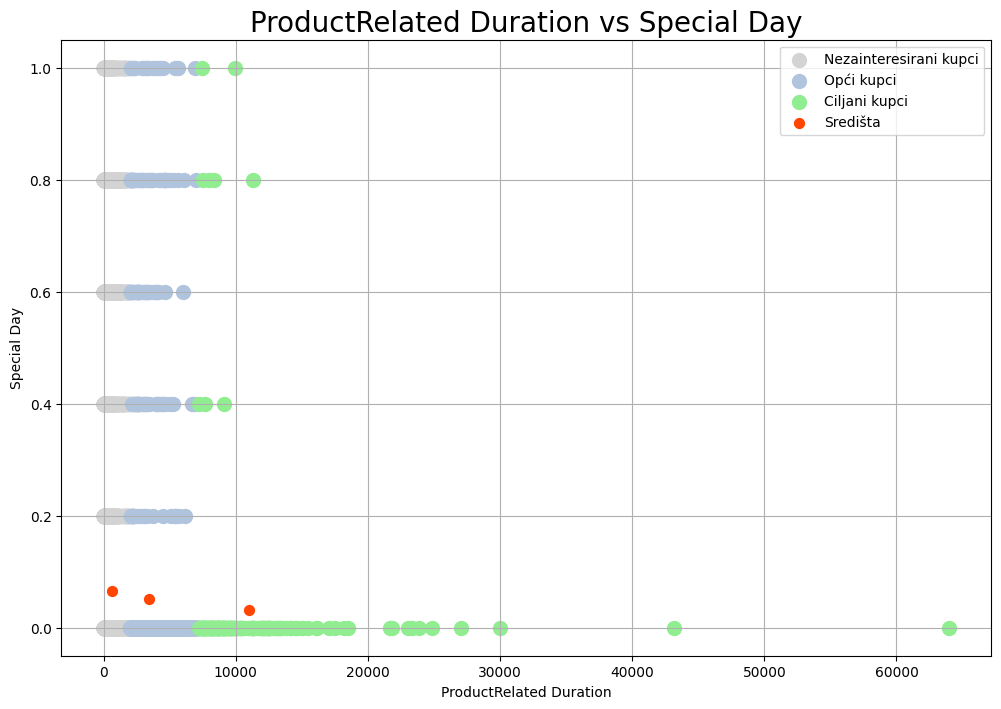

In [ ]:
x = data.iloc[:, [3, 7]].values #ProductRelated Duration i SpecialDay
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

centers = km.cluster_centers_
sorted_indices = np.argsort(centers[:, 0])  # Sort centroids by x-coordinate

# Create a mapping for labels
label_mapping = {original: new for new, original in enumerate(sorted_indices)}
y_means = np.array([label_mapping[label] for label in y_means])  # Reassign labels
km.cluster_centers_ = centers[sorted_indices]  # Sort centroids accordingly

plt.figure(figsize=(12, 8))

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=100, c='lightgray', label='Nezainteresirani kupci')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=100, c='lightsteelblue', label='Opći kupci')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s=100, c='lightgreen', label='Ciljani kupci')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=50, c='orangered', label='Središta')

plt.title('ProductRelated Duration vs Special Day', fontsize = 20)
plt.grid()
plt.xlabel('ProductRelated Duration')
plt.ylabel('Special Day')
plt.legend()
plt.show()

#Prediktivno Modeliranje

In [ ]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Klasifikacija - Random Forest

In [ ]:
#columns_to_drop = ['Administrative', 'Informational', 'TrafficType', 'Browser', 'Region']    # uspostavljeno da je model lošiji ako se izbace ove varijable

# Izbacivanje odabranih kolona
#data = data.drop(columns=columns_to_drop)

data1 = pd.get_dummies(data)

data1.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Revenue'] = le.fit_transform(data['Revenue'])
data['Revenue'].value_counts()

,count
Revenue,
0,10422
1,1908


In [ ]:
# getting dependent and independent variables

x = data1
# removing the target column revenue from x
x = x.drop(['Revenue'], axis = 1)

y = data['Revenue']

# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (12330, 28)
Shape of y: (12330,)


In [ ]:
# splitting the data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# checking the shapes

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (8631, 28)
Shape of y_train : (8631,)
Shape of x_test : (3699, 28)
Shape of y_test : (3699,)


Training Accuracy : 1.0
Testing Accuracy : 0.8953771289537713
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3077
           1       0.76      0.55      0.64       622

    accuracy                           0.90      3699
   macro avg       0.84      0.76      0.79      3699
weighted avg       0.89      0.90      0.89      3699



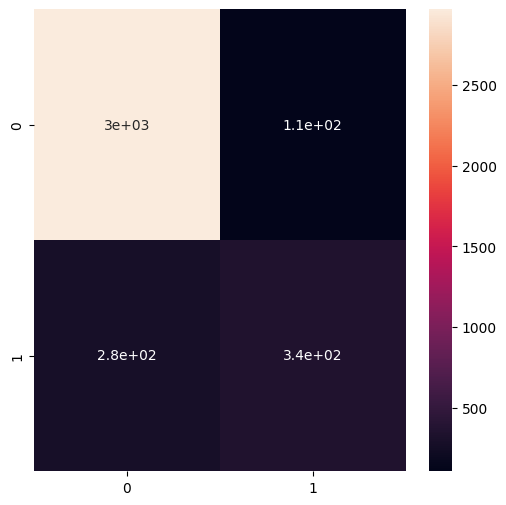

In [ ]:
# MODELLING

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

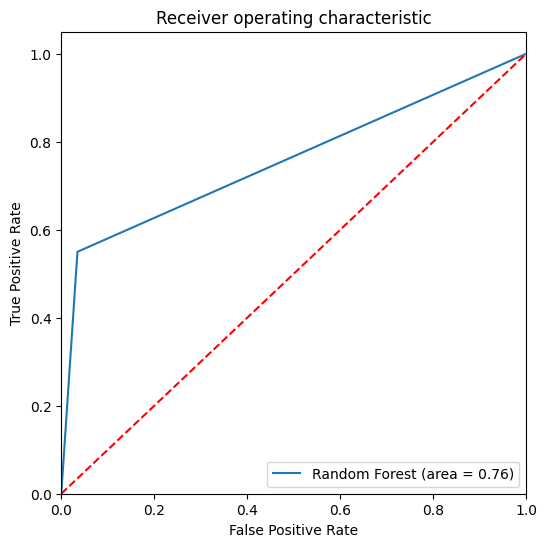

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# ROC krivulja i AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
logit_roc_auc = roc_auc_score(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Klasifikacija - Stablo odlučivanja

In [ ]:
# Uvoz potrebnih biblioteka
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [ ]:
data_tree = pd.get_dummies(data, drop_first=True)  # Using a new variable data_tree

# Pretvaranje True/False u 1/0 za sve logičke varijable
data_tree[data_tree.select_dtypes(include=['bool']).columns] = data_tree.select_dtypes(include=['bool']).astype(int)

# Prikaz prvih nekoliko redova sa generisanim dummy varijablama
data_tree.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
X = data_tree.drop('Revenue', axis=1)   # axis=1 označava da ispuštamo stupac (axis=0 bi ispustio redak).
y = data_tree['Revenue']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Najbolja dubina stabla: {'max_depth': 3}
Najbolja točnost: 0.9001415663177028
Točnost najboljeg modela na testnom skupu: 0.8884833738848338


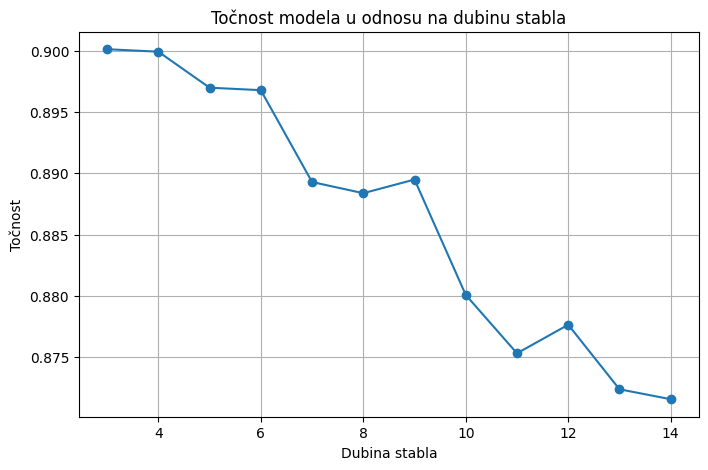

In [ ]:
# prompt: Funkcija za odabir veličine stabla odlučivanja na temelju accuracy i grafički prikaz

# Pronalaženje optimalne dubine stabla pomoću križne validacije
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(3, 15)}  # Isprobaj dubine od 3 do 14
tree = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy') # 5-struka križna validacija, procjena pomoću accuracy
grid_search.fit(X_train, y_train)

print("Najbolja dubina stabla:", grid_search.best_params_)
print("Najbolja točnost:", grid_search.best_score_)

best_tree = grid_search.best_estimator_
y_pred_best = best_tree.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Točnost najboljeg modela na testnom skupu: {accuracy_best}")

# Vizualizacija rezultata križne validacije
scores = grid_search.cv_results_['mean_test_score']
plt.figure(figsize=(8,5))
plt.plot(param_grid['max_depth'], scores, marker='o')
plt.xlabel('Dubina stabla')
plt.ylabel('Točnost')
plt.title('Točnost modela u odnosu na dubinu stabla')
plt.grid(True)
plt.show()

In [ ]:
# Kreiranje i treniranje stabla odlučivanja
model_stabla = DecisionTreeClassifier(random_state=42, max_depth=3)  # Ako bi bio klasifikacijski model, ciljna varijabla treba biti kategorijska
model_stabla.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

                          Feature  Importance
8                      PageValues    0.847658
6                     BounceRates    0.088430
21                      Month_Nov    0.050003
5         ProductRelated_Duration    0.011707
23                      Month_Sep    0.002203
0                  Administrative    0.000000
15                      Month_Dec    0.000000
24              VisitorType_Other    0.000000
22                      Month_Oct    0.000000
20                      Month_May    0.000000
19                      Month_Mar    0.000000
18                     Month_June    0.000000
17                      Month_Jul    0.000000
16                      Month_Feb    0.000000
13                    TrafficType    0.000000
14                        Weekend    0.000000
1         Administrative_Duration    0.000000
12                         Region    0.000000
11                        Browser    0.000000
10               OperatingSystems    0.000000
9                      SpecialDay 

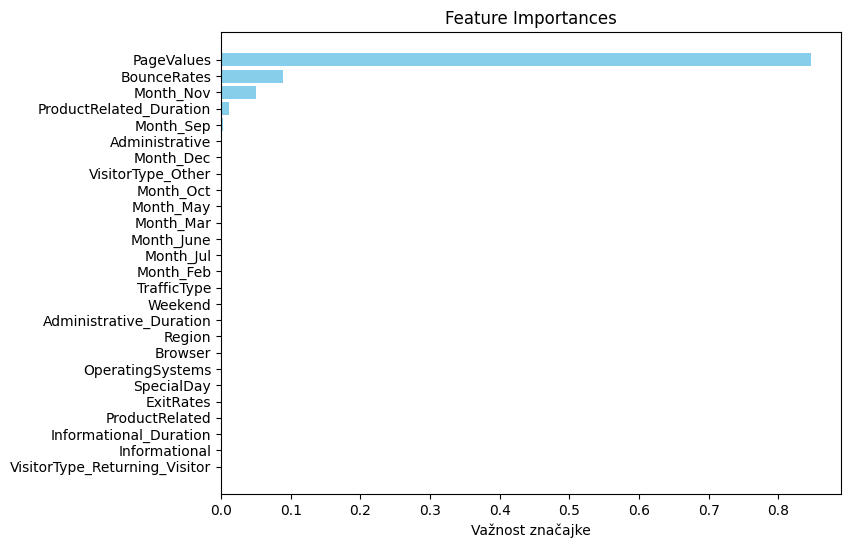

In [ ]:
feature_names = X_train.columns

# Dohvaćanje feature_importances_
importances = model_stabla.feature_importances_

# Prikaz važnosti značajki
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(importance_df)

# Vizualizacija
import matplotlib.pyplot as plt # Importing matplotlib.pyplot
plt.figure(figsize=(8, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color='skyblue')
plt.xlabel("Važnost značajke")
plt.title("Feature Importances")
plt.gca().invert_yaxis()  # Obrnuti redoslijed za bolji prikaz
plt.show()

In [ ]:
selected_features1 = importance_df[importance_df["Importance"] > 0.08]["Feature"].tolist()
selected_features2 = importance_df[importance_df["Importance"] > 0.05]["Feature"].tolist()
selected_features3 = importance_df[importance_df["Importance"] > 0]["Feature"].tolist()

#selected_features1 = importance_df[importance_df["Importance"] > 0.07]["Feature"].tolist()
#selected_features2 = importance_df[importance_df["Importance"] > 0.04]["Feature"].tolist()
#selected_features3 = importance_df[importance_df["Importance"] > 0.02]["Feature"].tolist()

X_train_selected1 = X_train[selected_features1]
X_test_selected1 = X_test[selected_features1]

X_train_selected2 = X_train[selected_features2]
X_test_selected2 = X_test[selected_features2]

X_train_selected3 = X_train[selected_features3]
X_test_selected3 = X_test[selected_features3]

model_stabla_selected1 = DecisionTreeClassifier(random_state=42, max_depth=3)
model_stabla_selected1.fit(X_train_selected1, y_train)

model_stabla_selected2 = DecisionTreeClassifier(random_state=42, max_depth=3)
model_stabla_selected2.fit(X_train_selected2, y_train)

model_stabla_selected3 = DecisionTreeClassifier(random_state=42, max_depth=3)
model_stabla_selected3.fit(X_train_selected3, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
# Predviđanje na testnom skupu
y_pred1 = model_stabla_selected1.predict(X_test_selected1)
y_pred2 = model_stabla_selected2.predict(X_test_selected2)
y_pred3 = model_stabla_selected3.predict(X_test_selected3)

Točnost modela: 0.8799675587996756
Matrica konfuzije:
[[1943  112]
 [ 184  227]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2055
           1       0.67      0.55      0.61       411

    accuracy                           0.88      2466
   macro avg       0.79      0.75      0.77      2466
weighted avg       0.87      0.88      0.88      2466



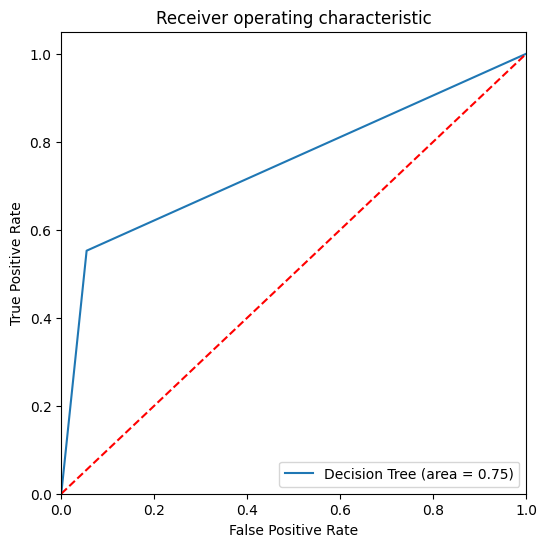

In [ ]:
# Evaluacija klasifikacijskog modela1

# Točnost modela
accuracy = accuracy_score(y_test, y_pred1)
print(f"Točnost modela: {accuracy}")

# Matrica zabune
cm = confusion_matrix(y_test, y_pred1)
print(f"Matrica konfuzije:\n{cm}")

# Izvješće o klasifikaciji
print(classification_report(y_test, y_pred1))

# ROC krivulja i AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
logit_roc_auc = roc_auc_score(y_test, y_pred1)

plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Optimal Threshold: 1.0


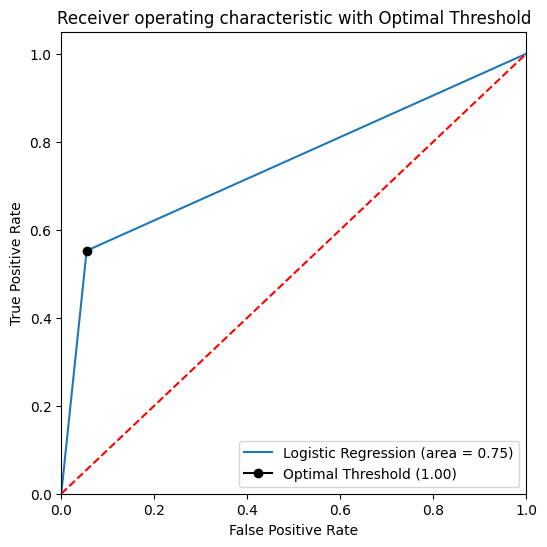

In [ ]:
# Find the optimal threshold based on the ROC curve
optimal_idx = np.argmax(tpr - fpr)  # You can use other metrics like Youden's J statistic
optimal_threshold = thresholds[optimal_idx % len(thresholds)] # Use modulo to ensure valid index

print(f"Optimal Threshold: {optimal_threshold}")

# Plot the ROC curve with the optimal threshold marked
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.plot(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label=f'Optimal Threshold ({optimal_threshold:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with Optimal Threshold')
plt.legend(loc="lower right")
plt.show()

Točnost modela: 0.8884833738848338
Matrica konfuzije:
[[1951  104]
 [ 171  240]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2055
           1       0.70      0.58      0.64       411

    accuracy                           0.89      2466
   macro avg       0.81      0.77      0.78      2466
weighted avg       0.88      0.89      0.88      2466



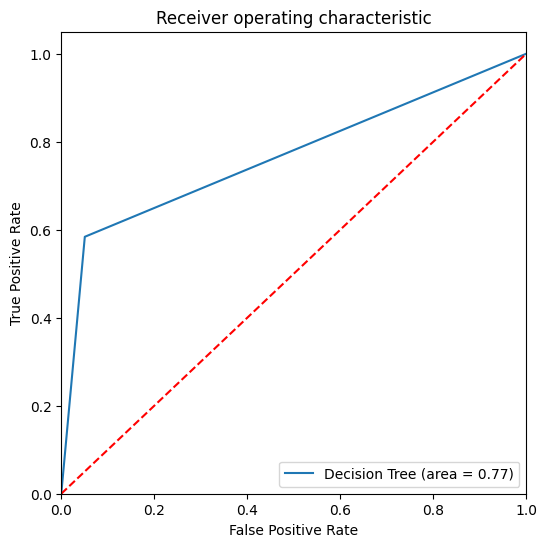

In [ ]:
# Evaluacija klasifikacijskog modela1

# Točnost modela
accuracy = accuracy_score(y_test, y_pred2)
print(f"Točnost modela: {accuracy}")

# Matrica zabune
cm = confusion_matrix(y_test, y_pred2)
print(f"Matrica konfuzije:\n{cm}")

# Izvješće o klasifikaciji
print(classification_report(y_test, y_pred2))

# ROC krivulja i AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
logit_roc_auc = roc_auc_score(y_test, y_pred2)

plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Optimal Threshold: 1.0


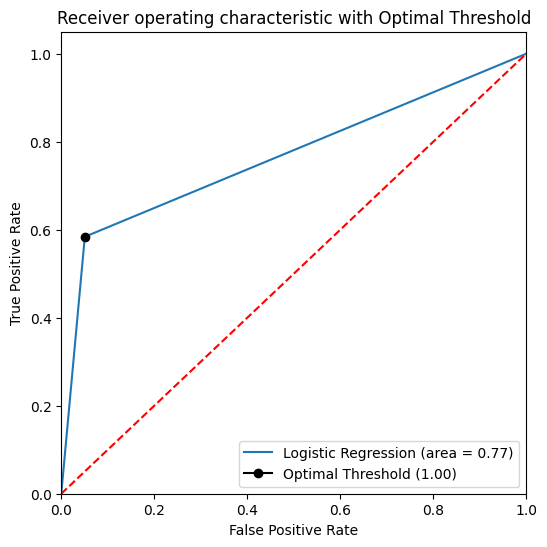

In [ ]:
# Find the optimal threshold based on the ROC curve
optimal_idx = np.argmax(tpr - fpr)  # You can use other metrics like Youden's J statistic
optimal_threshold = thresholds[optimal_idx % len(thresholds)] # Use modulo to ensure valid index

print(f"Optimal Threshold: {optimal_threshold}")

# Plot the ROC curve with the optimal threshold marked
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.plot(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label=f'Optimal Threshold ({optimal_threshold:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with Optimal Threshold')
plt.legend(loc="lower right")
plt.show()

Točnost modela: 0.8884833738848338
Matrica konfuzije:
[[1951  104]
 [ 171  240]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2055
           1       0.70      0.58      0.64       411

    accuracy                           0.89      2466
   macro avg       0.81      0.77      0.78      2466
weighted avg       0.88      0.89      0.88      2466



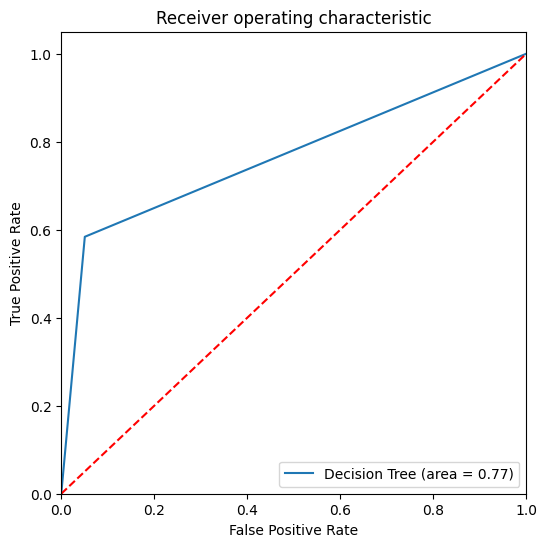

In [ ]:
# Evaluacija klasifikacijskog modela1

# Točnost modela
accuracy = accuracy_score(y_test, y_pred3)
print(f"Točnost modela: {accuracy}")

# Matrica zabune
cm = confusion_matrix(y_test, y_pred3)
print(f"Matrica konfuzije:\n{cm}")

# Izvješće o klasifikaciji
print(classification_report(y_test, y_pred3))

# ROC krivulja i AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
logit_roc_auc = roc_auc_score(y_test, y_pred3)

plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Optimal Threshold: 1.0


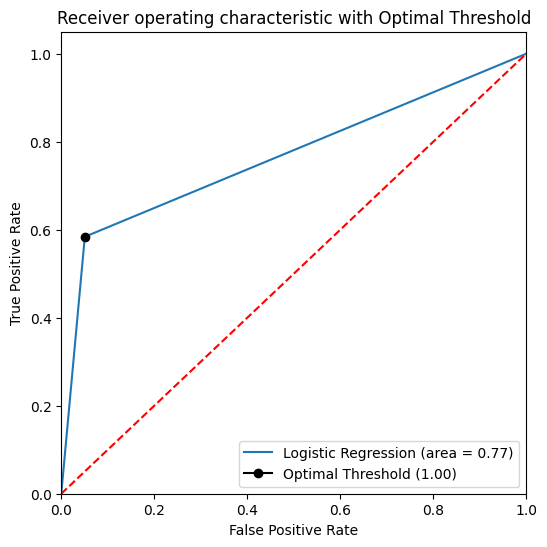

In [ ]:
# Find the optimal threshold based on the ROC curve
optimal_idx = np.argmax(tpr - fpr)  # You can use other metrics like Youden's J statistic
optimal_threshold = thresholds[optimal_idx % len(thresholds)] # Use modulo to ensure valid index

print(f"Optimal Threshold: {optimal_threshold}")

# Plot the ROC curve with the optimal threshold marked
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.plot(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label=f'Optimal Threshold ({optimal_threshold:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with Optimal Threshold')
plt.legend(loc="lower right")
plt.show()

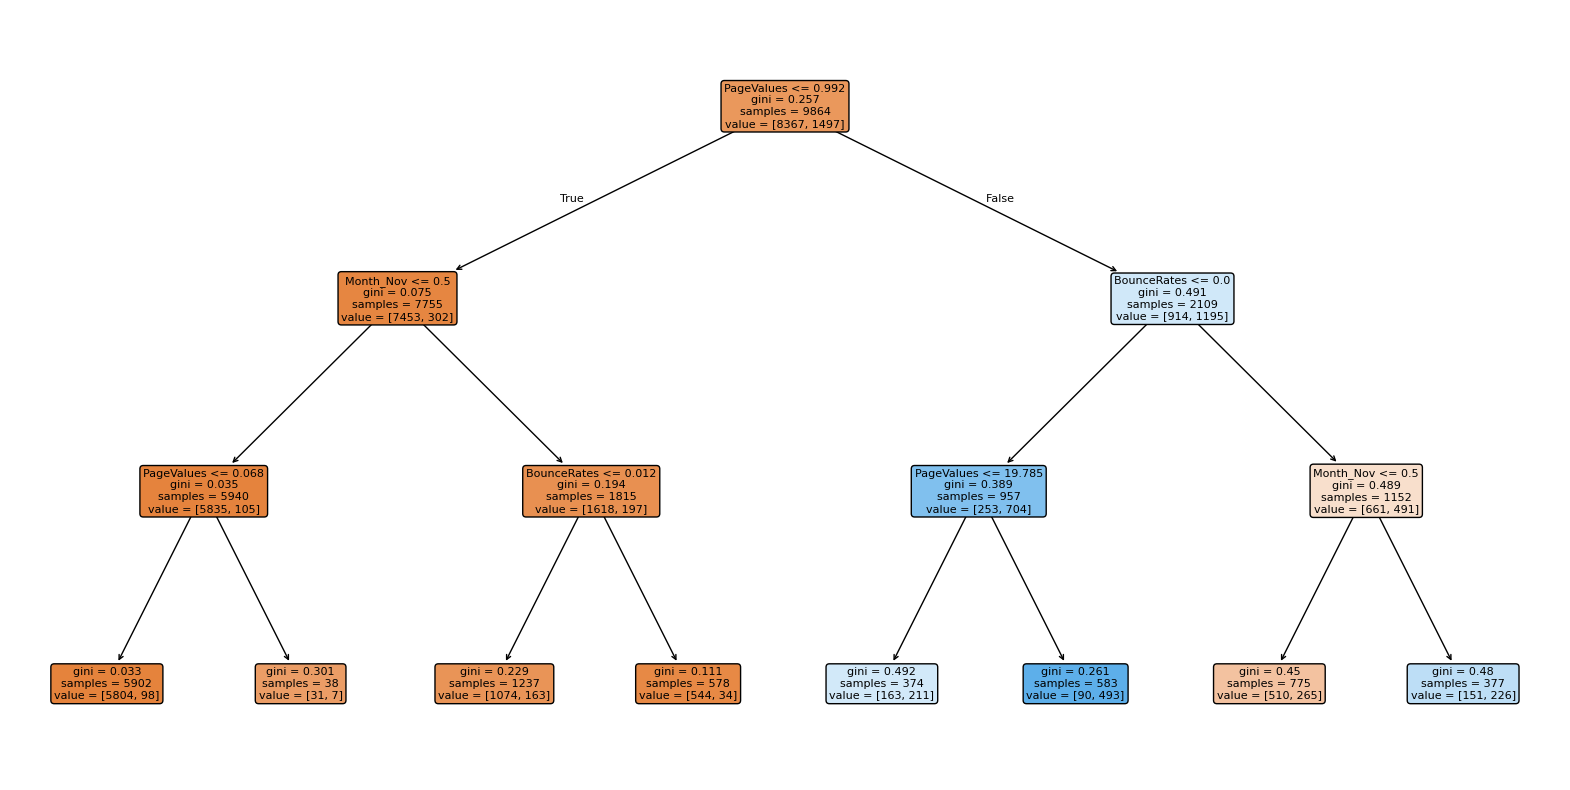

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(model_stabla_selected2, feature_names=X_train_selected2.columns, filled=True, rounded=True, fontsize=8)
plt.show()

## Klasifikacija - Support Vector Classifier (SVC)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
svm_clf = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_clf.fit(X_train, y_train)

SVC(C=1, random_state=42)

In [ ]:
y_pred = svm_clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Product not bought', 'Product bought'])

print(f"Točnost: {accuracy:.2f}")
print("\nClassification Report:\n")
print(report)

Točnost: 0.88

Classification Report:

                    precision    recall  f1-score   support

Product not bought       0.89      0.97      0.93      2055
    Product bought       0.74      0.43      0.54       411

          accuracy                           0.88      2466
         macro avg       0.82      0.70      0.74      2466
      weighted avg       0.87      0.88      0.87      2466



In [ ]:
# dio za pretraživanje optimalnih hiperparametara, utvrđeno je kako su optimalni parametri: kernel='rbf', C=5.651157902710025, gamma=0.01

"""
from scipy.stats import uniform

param_dist = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': uniform(0.01, 100),  # Uniformna distribucija za C
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

svc = SVC()
random_search = RandomizedSearchCV(
    estimator=SVC(),
    param_distributions=param_dist,
    n_iter=20,  # Smanjen broj iteracija
    cv=3,       # Smanjen broj presjeka
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)

# Prikaz najboljih parametara i rezultata
print("Najbolji parametri:", random_search.best_params_)
print("Najbolja točnost unakrsne validacije:", random_search.best_score_)

# Testirajte na testnom skupu
best_model = random_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Točnost:", test_accuracy)

"""

'\nfrom scipy.stats import uniform\n\nparam_dist = {\n    \'kernel\': [\'linear\', \'rbf\', \'poly\', \'sigmoid\'],\n    \'C\': uniform(0.01, 100),  # Uniformna distribucija za C\n    \'gamma\': [\'scale\', \'auto\', 0.001, 0.01, 0.1, 1]\n}\n\nsvc = SVC()\nrandom_search = RandomizedSearchCV(\n    estimator=SVC(),\n    param_distributions=param_dist,\n    n_iter=20,  # Smanjen broj iteracija\n    cv=3,       # Smanjen broj presjeka\n    scoring=\'accuracy\',\n    verbose=2,\n    n_jobs=-1,\n    random_state=42\n)\nrandom_search.fit(X_train, y_train)\n\n# Prikaz najboljih parametara i rezultata\nprint("Najbolji parametri:", random_search.best_params_)\nprint("Najbolja točnost unakrsne validacije:", random_search.best_score_)\n\n# Testirajte na testnom skupu\nbest_model = random_search.best_estimator_\ntest_accuracy = best_model.score(X_test, y_test)\nprint("Točnost:", test_accuracy)\n\n'

In [ ]:
svm_clf = SVC(kernel='rbf', C=5.651157902710025, gamma=0.01, random_state=42)
svm_clf.fit(X_train, y_train)

SVC(C=5.651157902710025, gamma=0.01, random_state=42)

In [ ]:
y_pred = svm_clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Product not bought', 'Product bought'])

print(f"Točnost: {accuracy:.2f}")
print("\nClassification Report:\n")
print(report)

Točnost: 0.88

Classification Report:

                    precision    recall  f1-score   support

Product not bought       0.90      0.97      0.93      2055
    Product bought       0.74      0.45      0.56       411

          accuracy                           0.88      2466
         macro avg       0.82      0.71      0.74      2466
      weighted avg       0.87      0.88      0.87      2466



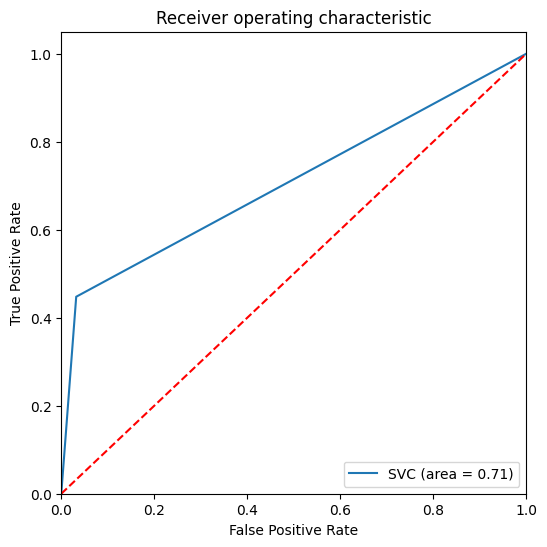

In [ ]:
# ROC krivulja i AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
logit_roc_auc = roc_auc_score(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, label='SVC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Regresija - K-NN za regresiju

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
# određivanje ulaznih varijabli i ciljne
Y=data['ProductRelated_Duration']
X=data.drop('ProductRelated_Duration', axis=1)

In [ ]:
# kodiranje kategorijskih varijabli
X=pd.get_dummies(X, drop_first=True)

In [ ]:
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.20,0.20,0.0,0.0,1,...,True,False,False,False,False,False,False,False,False,True
1,0,0.0,0,0.0,2,0.00,0.10,0.0,0.0,2,...,True,False,False,False,False,False,False,False,False,True
2,0,0.0,0,0.0,1,0.20,0.20,0.0,0.0,4,...,True,False,False,False,False,False,False,False,False,True
3,0,0.0,0,0.0,2,0.05,0.14,0.0,0.0,3,...,True,False,False,False,False,False,False,False,False,True
4,0,0.0,0,0.0,10,0.02,0.05,0.0,0.0,3,...,True,False,False,False,False,False,False,False,False,True


In [ ]:
# podjela na skup za treniranje i testiranje
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())

Administrative                   0
Administrative_Duration          0
Informational                    0
Informational_Duration           0
ProductRelated                   0
BounceRates                      0
ExitRates                        0
PageValues                       0
SpecialDay                       0
OperatingSystems                 0
Browser                          0
Region                           0
TrafficType                      0
Weekend                          0
Revenue                          0
Month_Dec                        0
Month_Feb                        0
Month_Jul                        0
Month_June                       0
Month_Mar                        0
Month_May                        0
Month_Nov                        0
Month_Oct                        0
Month_Sep                        0
VisitorType_Other                0
VisitorType_Returning_Visitor    0
dtype: int64
Administrative                   0
Administrative_Duration          0
Informa

In [ ]:
# definiranje pipeline-a
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

In [ ]:
# treniranje modela s različitim vrijednostima k

rmse_scores = []
r2_scores = []

for k in range(1, 31):
    pipe.set_params(knn__n_neighbors=k)
    pipe.fit(X_train, Y_train)
    Y_pred = pipe.predict(X_test)
    rmse = mean_squared_error(Y_test, Y_pred) ** 0.5
    rmse_scores.append(rmse)
    r2_scores.append(r2_score(Y_test, Y_pred))


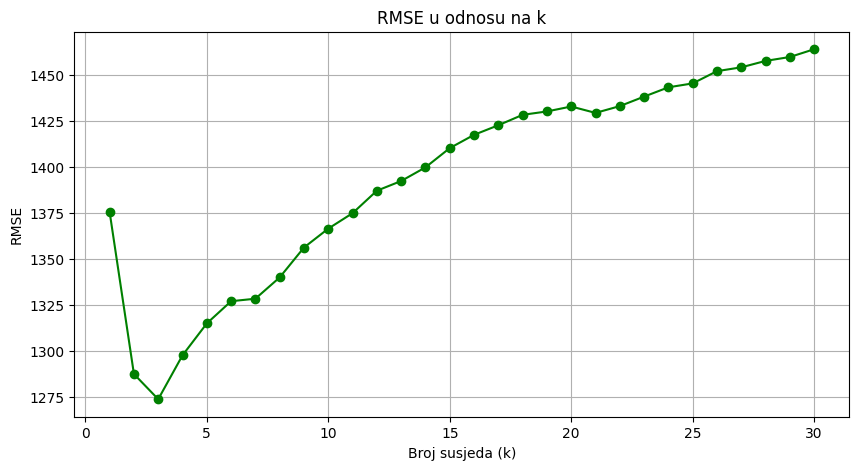

In [ ]:
# Grafički prikaz RMSE i R^2 u odnosu na k
plt.figure(figsize=(10, 5))
plt.plot(range(1, 31), rmse_scores, label='RMSE', marker='o', color='green')
plt.xlabel('Broj susjeda (k)')
plt.ylabel('RMSE')
plt.title('RMSE u odnosu na k')
plt.grid(True)
plt.show()


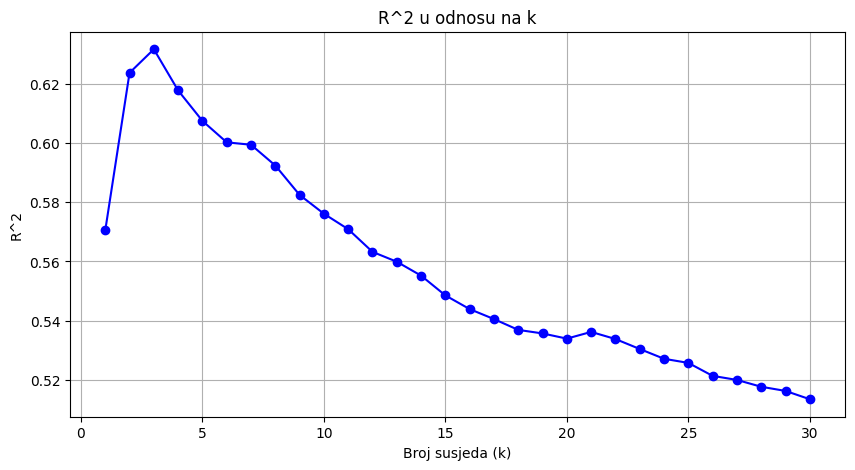

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 31), r2_scores, label='R^2', marker='o', color='blue')
plt.xlabel('Broj susjeda (k)')
plt.ylabel('R^2')
plt.title('R^2 u odnosu na k')
plt.grid(True)
plt.show()

In [ ]:
# pronalazak najboljeg k
best_k = rmse_scores.index(min(rmse_scores)) + 1
print(f'Najbolji broj susjeda (k): {best_k}')
print(f'RMSE za najbolji k: {min(rmse_scores):.4f}')
print(f'R^2 za najbolji k: {r2_scores[best_k - 1]:.4f}')

Najbolji broj susjeda (k): 3
RMSE za najbolji k: 1273.8133
R^2 za najbolji k: 0.6317


In [ ]:
# GridSearchCV za preciznu optimizaciju k
param_grid = {'knn__n_neighbors': range(1, 31)}
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsRegressor(n_neighbors=30))]),
             param_grid={'knn__n_neighbors': range(1, 31)},
             scoring='neg_mean_squared_error')

In [ ]:
best_model = grid_search.best_estimator_
print(f'Optimalni broj susjeda prema GridSearchCV: {grid_search.best_params_}')

Optimalni broj susjeda prema GridSearchCV: {'knn__n_neighbors': 7}


In [ ]:
# evaluacija najboljeg modela
Y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(Y_test, Y_pred_best)
r2_best = r2_score(Y_test, Y_pred_best)

print("Rezultati najboljeg modela:")
print(f"RMSE: {mse_best ** 0.5:.4f}")
print(f"R^2: {r2_best:.4f}")

Rezultati najboljeg modela:
RMSE: 1328.4705
R^2: 0.5994
